In [1]:
import pandas as pd 
import pybioportal as pybio
from pybioportal import clinical_data as cd
import requests
from pybioportal import clinical_attributes as ca
import json
import os


In [2]:
df = ca.fetch_clinical_attributes(study_ids=["coadread_tcga"])

In [3]:
df

,displayName,description,datatype,patientAttribute,priority,clinicalAttributeId,studyId
0,Diagnosis Age,Age at which a condition or disease was first ...,NUMBER,True,1,AGE,coadread_tcga
1,American Joint Committee on Cancer Metastasis ...,Code to represent the defined absence or prese...,STRING,True,1,AJCC_METASTASIS_PATHOLOGIC_PM,coadread_tcga
2,Neoplasm Disease Lymph Node Stage American Joi...,The codes that represent the stage of cancer b...,STRING,True,1,AJCC_NODES_PATHOLOGIC_PN,coadread_tcga
3,Neoplasm Disease Stage American Joint Committe...,"The extent of a cancer, especially whether the...",STRING,True,1,AJCC_PATHOLOGIC_TUMOR_STAGE,coadread_tcga
4,American Joint Committee on Cancer Publication...,The version or edition of the American Joint C...,STRING,True,1,AJCC_STAGING_EDITION,coadread_tcga
...,...,...,...,...,...,...,...
82,Primary Therapy Outcome Success Type,Text term for the measure of success of outcom...,STRING,True,1,TREATMENT_OUTCOME_FIRST_COURSE,coadread_tcga
83,Person Neoplasm Status,The state or condition of an individual's neop...,STRING,True,1,TUMOR_STATUS,coadread_tcga
84,Vascular invasion indicator,Vascular invasion indicator,STRING,True,1,VASCULAR_INVASION_INDICATOR,coadread_tcga
85,Vial number,Vial number,STRING,False,1,VIAL_NUMBER,coadread_tcga


In [4]:
attribute_ids=["OS_STATUS", "OS_MONTHS", "RACE"]

df_c=cd.fetch_all_clinical_data_in_study(study_id="coadread_tcga",
                                       attribute_ids=attribute_ids,
                                       clinical_data_type="PATIENT", 
                                       ret_format="WIDE")

In [5]:
df_c

clinicalAttributeId,uniquePatientKey,patientId,studyId,OS_MONTHS,OS_STATUS,RACE
0,VENHQS00Ti1BOTNUOmNvYWRyZWFkX3RjZ2E,TCGA-4N-A93T,coadread_tcga,4.8,0:LIVING,BLACK OR AFRICAN AMERICAN
1,VENHQS00VC1BQThIOmNvYWRyZWFkX3RjZ2E,TCGA-4T-AA8H,coadread_tcga,12.65,0:LIVING,BLACK OR AFRICAN AMERICAN
2,VENHQS01TS1BQVQ0OmNvYWRyZWFkX3RjZ2E,TCGA-5M-AAT4,coadread_tcga,1.61,1:DECEASED,BLACK OR AFRICAN AMERICAN
3,VENHQS01TS1BQVQ2OmNvYWRyZWFkX3RjZ2E,TCGA-5M-AAT6,coadread_tcga,9.53,1:DECEASED,BLACK OR AFRICAN AMERICAN
4,VENHQS01TS1BQVRFOmNvYWRyZWFkX3RjZ2E,TCGA-5M-AATE,coadread_tcga,39.42,0:LIVING,BLACK OR AFRICAN AMERICAN
...,...,...,...,...,...,...
624,VENHQS1RTC1BOTdEOmNvYWRyZWFkX3RjZ2E,TCGA-QL-A97D,coadread_tcga,21.88,0:LIVING,BLACK OR AFRICAN AMERICAN
625,VENHQS1SVS1BOEZMOmNvYWRyZWFkX3RjZ2E,TCGA-RU-A8FL,coadread_tcga,38.67,0:LIVING,BLACK OR AFRICAN AMERICAN
626,VENHQS1TUy1BN0hPOmNvYWRyZWFkX3RjZ2E,TCGA-SS-A7HO,coadread_tcga,60.09,0:LIVING,BLACK OR AFRICAN AMERICAN
627,VENHQS1UOS1BOTJIOmNvYWRyZWFkX3RjZ2E,TCGA-T9-A92H,coadread_tcga,11.89,0:LIVING,BLACK OR AFRICAN AMERICAN


In [6]:
# Endpoint de consulta para o GDC
api_url = 'https://api.gdc.cancer.gov/cases'

# Filtro para o projeto TCGA-COADREAD (colo e reto)
filters = {
    "op": "and",
    "content": [
        {"op": "in", "content": {"field": "cases.project.project_id", "value": ["TCGA-COAD", "TCGA-READ"]}},
    ]
}

# Parâmetros da query (quais campos buscar)
params = {
    "filters": json.dumps(filters),
    "fields": "submitter_id,diagnoses.age_at_diagnosis,demographic.gender", # IDs e dados clínicos
    "format": "json",
    "size": "2000" # Tenta buscar até 2000 casos
}

response = requests.get(api_url, params=params)
data = response.json()

# Converter o resultado para um DataFrame do Pandas
casos_tcga = [item['submitter_id'] for item in data['data']['hits']]
print(f"Número de casos TCGA-COAD/READ encontrados: {len(casos_tcga)}")

Número de casos TCGA-COAD/READ encontrados: 633


In [9]:
# --- VARIÁVEIS DE CONFIGURAÇÃO ---
# O caminho para a pasta onde o gdc-client salvou os dados

DIRETORIO_DOWNLOAD = "C:\\Users\\vinic\\Documents\\0 - Pesquisa e Pós-Graduação\\Doutorado\\Genomics\\tcga\\dados" # Ajuste se for diferente
# O nome do arquivo manifesto que você usou
CAMINHO_MANIFESTO = "C:\\Users\\vinic\\Documents\\0 - Pesquisa e Pós-Graduação\\Doutorado\\Genomics\\tcga\\manifesto\\gdc_manifest.2025-10-15.123035.txt"

# Nome do arquivo de saída (a matriz consolidada)
ARQUIVO_SAIDA = "C:\\Users\\vinic\\Documents\\0 - Pesquisa e Pós-Graduação\\Doutorado\\Genomics\\tcga\\dados\\TCGA_COADREAD_RNAseq_Matrix.csv"

# O nome exato do arquivo de dados dentro de cada pasta UUID
# (Pode variar, ajuste conforme o nome do arquivo que você encontrar dentro da primeira pasta de UUID)
NOME_ARQUIVO_DADOS = "arquivo_de_expressao.tsv"



In [10]:
# 1. Carregar o Manifesto e Mapear File ID para Sample ID
print(f"1. Carregando manifesto: {CAMINHO_MANIFESTO}")
# O manifesto mapeia o File ID (UUID) para o Sample ID (TCGA-XX-XXXX)
try:
    manifesto_df = pd.read_csv(CAMINHO_MANIFESTO, sep='\t')
    # O GDC usa 'id' para o UUID e 'filename' como o nome do arquivo
    # 'file_id' é o UUID, e 'case_submitter_id' é o Patient/Case ID
    mapeamento_ids = manifesto_df[['id', 'filename']].set_index('id')
except Exception as e:
    print(f"Erro ao carregar o manifesto. Certifique-se de que o caminho está correto e o separador é tab ('\\t'). Erro: {e}")
    exit()

1. Carregando manifesto: C:\Users\vinic\Documents\0 - Pesquisa e Pós-Graduação\Doutorado\Genomics\tcga\manifesto\gdc_manifest.2025-10-15.123035.txt


In [ ]:
# --- VARIÁVEIS DE CONFIGURAÇÃO ---
# O caminho para a PASTA onde o gdc-client salvou os dados
# Geralmente, é uma subpasta chamada "gdc_downloads" ou o próprio diretório de trabalho
#DIRETORIO_DOWNLOAD = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/gdc_downloads"  # <-- ATENÇÃO: Corrija este caminho para ser uma PASTA (diretório)

# O caminho para o ARQUIVO de manifesto que você usou
#CAMINHO_MANIFESTO = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/gdc_manifest.2025-10-15.123035.txt"


In [11]:
# 1. Carregar o Manifesto e Mapear File ID para Sample ID
print(f"1. Carregando manifesto: {CAMINHO_MANIFESTO}")

try:
    # Use 'sep=\t' (separador de tabulação) e 'header=0' para usar a primeira linha como cabeçalho
    manifesto_df = pd.read_csv(CAMINHO_MANIFESTO, sep='\t', header=0) 
    
    # Imprime as colunas para depuração:
    print("Colunas lidas no manifesto:")
    print(manifesto_df.columns.tolist()) 
    
    # Verifique se as colunas 'id' e 'filename' existem
    if 'id' in manifesto_df.columns and 'filename' in manifesto_df.columns:
        mapeamento_ids = manifesto_df[['id', 'filename']].set_index('id')
        print("Manifesto carregado com sucesso.")
    else:
        # Se as colunas não existirem, provavelmente houve um erro de leitura do cabeçalho
        raise KeyError("Colunas 'id' ou 'filename' não encontradas. Verifique o separador (sep='\\t') ou o cabeçalho (header=0).")

except KeyError as e:
    print(f"Erro: {e}. Verifique se as colunas do seu manifesto são realmente 'id' e 'filename'.")
    exit()
except Exception as e:
    print(f"Erro inesperado ao carregar o manifesto: {e}")
    exit()


1. Carregando manifesto: C:\Users\vinic\Documents\0 - Pesquisa e Pós-Graduação\Doutorado\Genomics\tcga\manifesto\gdc_manifest.2025-10-15.123035.txt
Colunas lidas no manifesto:
['id', 'filename', 'md5', 'size', 'state']
Manifesto carregado com sucesso.


In [12]:
mapeamento_ids.index.tolist()

['341ac972-523d-4dd8-90cd-b68e8407fc98',
 '2c73d8ac-84b9-4094-9f5e-fbd6c2e8eabf',
 '7389dfaa-fa36-431f-a3b9-960b4fb9d836',
 'd77dfe53-77dd-46c9-80a4-19d343e8ee36',
 'b0a80c40-eb93-490a-932a-dc4cbc1a92b3',
 '456e94a2-2a07-426c-9857-3d71647393a9',
 'd6af00a8-d733-4788-aaf4-8522479eba2d',
 '411ef195-13d2-4c3a-b8df-b3e6150fe73d',
 'c5bd36a5-d486-4603-882a-961288d35030',
 'fb6ca177-100e-4b2a-8a8f-b127b058a11c',
 '52defb9b-4d00-4e24-a4ed-7a2742660ac6',
 'ceda9640-c563-4bd4-89af-f6048403fabd',
 'faadcd3b-56d0-4c36-a1e7-5189510de75b',
 '69ccf4e3-15a5-4e1d-91af-402100e85349',
 'da670207-560b-42d7-a906-bd9d590b631a',
 '69add746-94ce-4b57-bf7a-f80bf10bdc01',
 '02b72475-be56-41dd-afb5-a989d0f76ccb',
 'b8e2661a-1cc0-4c33-9131-6a2f96f73d54',
 'b315758e-62d1-408b-9510-fc0a4294f7ec',
 '4f9ced4a-9262-456c-b71c-3d9a22c1f7e2',
 '835d2360-3e00-4c3c-9d01-039a2915bd4c',
 '9553502a-98ec-45f8-a597-fc0d0217d2a8',
 '363e9f25-63d0-4b66-bf5e-f2dc1f92b10f',
 '13adf2e8-9a0d-4e46-975c-4f4810e6bfed',
 '17add25f-e442-

In [13]:
mapeamento_ids.reset_index()['id']

0      341ac972-523d-4dd8-90cd-b68e8407fc98
1      2c73d8ac-84b9-4094-9f5e-fbd6c2e8eabf
2      7389dfaa-fa36-431f-a3b9-960b4fb9d836
3      d77dfe53-77dd-46c9-80a4-19d343e8ee36
4      b0a80c40-eb93-490a-932a-dc4cbc1a92b3
                       ...                 
870    03277451-4bc3-4c62-947a-0951276ee8e9
871    4ba379c6-bfff-44fc-8c24-ecde87a78249
872    8264b149-63b5-4d6a-a98f-03127ff14e0d
873    d3980bb6-edb0-482e-a8fb-2da0d0ca36d9
874    6990183f-ee04-4d62-a1fd-58997132ca0e
Name: id, Length: 875, dtype: object

In [14]:
# --- VARIÁVEIS DE CONFIGURAÇÃO ---
# O caminho para a PASTA que CONTÉM as pastas UUID dos downloads.
# ATENÇÃO: Se o gdc-client criou uma pasta chamada 'coadread_tcga_pan_can_atlas_2018' 
# e as pastas UUID estão DENTRO dela, este deve ser o caminho para essa pasta!
DIRETORIO_DOWNLOAD = "C:\\Users\\vinic\\Documents\\0 - Pesquisa e Pós-Graduação\\Doutorado\\Genomics\\tcga\\coadread_tcga_pan_can_atlas_2018"

# O manifesto já carregado corretamente
# CAMINHO_MANIFESTO = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/gdc_manifest.2025-10-15.123035.txt" 
# --- FIM DAS VARIÁVEIS ---

# Assumindo que mapeamento_ids e manifesto_df foram carregados na célula anterior.

# 2. Iterar e Consolidar os Dados
dados_consolidados = {}
# **CORREÇÃO CRÍTICA DO PROBLEMA 1 (KeyError):** # Itera apenas sobre os IDs que existem no seu manifesto (UUIDs de arquivos válidos)
lista_ids_arquivos = mapeamento_ids.index.tolist() 

total_arquivos = len(lista_ids_arquivos)
arquivos_processados = 0

print(f"2. Consolidando dados de {total_arquivos} arquivos (pulando pastas extras como case_lists)...")

for pasta_uuid in lista_ids_arquivos:
    arquivos_processados += 1
    print(f"   -> Processando arquivo {arquivos_processados}/{total_arquivos}: {pasta_uuid}...", end='\r')

    try:
        # Pega o nome real do arquivo da coluna 'filename' no DataFrame mapeamento_ids
        nome_real_arquivo = mapeamento_ids.loc[pasta_uuid]['filename'] 
    except KeyError:
        # Se houver algum UUID no manifesto que não está no mapeamento (o que é raro, mas seguro incluir)
        print(f"\nAVISO: UUID {pasta_uuid} não encontrado no mapeamento. Pulando.")
        continue

    # Constrói o caminho completo: DIRETORIO_DOWNLOAD / UUID_pasta / Nome_do_Arquivo_TSV
    pasta_path = os.path.join(DIRETORIO_DOWNLOAD, pasta_uuid)
    caminho_dados = os.path.join(pasta_path, nome_real_arquivo) 

    if not os.path.exists(caminho_dados):
        print(f"\nERRO DE CAMINHO: Arquivo não encontrado em {caminho_dados}. Pulando.")
        continue

    # Carregar o arquivo de dados
    try:
        # Assumindo que é o formato padrão STAR gene counts: 2 colunas, sem cabeçalho no .tsv
        df_temp = pd.read_csv(caminho_dados, sep='\t', header=None, index_col=0) 
        
        # O arquivo de STAR RNA-Seq tem 4 linhas de metadados no início. Precisamos removê-las!
        # Se a primeira linha não for um gene ID, provavelmente precisamos pular o cabeçalho.
        # Vamos usar a segunda coluna (índice 1) para o valor de expressão.
        
        # Pula as 4 primeiras linhas de metadados se for STAR count
        if df_temp.shape[0] > 4 and df_temp.index[0].startswith('N_'):
             df_temp = pd.read_csv(caminho_dados, sep='\t', header=None, index_col=0, skiprows=4)
        
        df_temp.index.name = 'Gene_ID'
        df_temp.columns = [pasta_uuid]
        
        # Pega a primeira coluna de dados (índice 0, pois pulamos as linhas de meta)
        dados_consolidados[pasta_uuid] = df_temp.iloc[:, 0] 
        
    except Exception as e:
        print(f"\nERRO na leitura de {nome_real_arquivo}: {e}. Pulando.")
        continue

# 3. Criar a Matriz Final
print("\n3. Criando a matriz final (DataFrame Pandas)...")
matriz_final = pd.DataFrame(dados_consolidados)

# 4. Salvar o Resultado
# Correção da variável ARQUIVO_SAIDA
# Use um caminho absoluto e verificado.
#ARQUIVO_SAIDA = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/TCGA_COADREAD_RNAseq_Matrix.csv"
print(f"4. Salvando a matriz final em: {ARQUIVO_SAIDA}")
matriz_final.to_csv(ARQUIVO_SAIDA)

print("\n--- Processo Concluído ---")

2. Consolidando dados de 875 arquivos (pulando pastas extras como case_lists)...
   -> Processando arquivo 1/875: 341ac972-523d-4dd8-90cd-b68e8407fc98...
ERRO DE CAMINHO: Arquivo não encontrado em C:\Users\vinic\Documents\0 - Pesquisa e Pós-Graduação\Doutorado\Genomics\tcga\coadread_tcga_pan_can_atlas_2018\341ac972-523d-4dd8-90cd-b68e8407fc98\TCGA-AA-3688-01A-21-1932-20_RPPA_data.tsv. Pulando.
   -> Processando arquivo 2/875: 2c73d8ac-84b9-4094-9f5e-fbd6c2e8eabf...
ERRO DE CAMINHO: Arquivo não encontrado em C:\Users\vinic\Documents\0 - Pesquisa e Pós-Graduação\Doutorado\Genomics\tcga\coadread_tcga_pan_can_atlas_2018\2c73d8ac-84b9-4094-9f5e-fbd6c2e8eabf\c8c7600d-2c13-4df1-b058-2d02432bd49e.rna_seq.augmented_star_gene_counts.tsv. Pulando.
   -> Processando arquivo 3/875: 7389dfaa-fa36-431f-a3b9-960b4fb9d836...
ERRO DE CAMINHO: Arquivo não encontrado em C:\Users\vinic\Documents\0 - Pesquisa e Pós-Graduação\Doutorado\Genomics\tcga\coadread_tcga_pan_can_atlas_2018\7389dfaa-fa36-431f-a3b9-96

In [36]:
DIRETORIO_DOWNLOAD = "C:\\Users\\vinic\\Documents\\0 - Pesquisa e Pós-Graduação\\Doutorado\\Genomics\\tcga\\coadread_tcga_pan_can_atlas_2018"
print(f"Conteúdo de {DIRETORIO_DOWNLOAD}:")
print(os.listdir(DIRETORIO_DOWNLOAD))

Conteúdo de C:\Users\vinic\Documents\0 - Pesquisa e Pós-Graduação\Doutorado\Genomics\tcga\coadread_tcga_pan_can_atlas_2018:
['.DS_Store', 'case_lists', 'data_armlevel_cna.txt', 'data_clinical_patient.txt', 'data_clinical_sample.txt', 'data_clinical_supp_hypoxia.txt', 'data_cna.txt', 'data_cna_hg19.seg', 'data_genetic_ancestry.txt', 'data_gene_panel_matrix.txt', 'data_log2_cna.txt', 'data_methylation_hm27_hm450_merged.txt', 'data_mrna_seq_v2_rsem.txt', 'data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt', 'data_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt', 'data_mrna_seq_v2_rsem_zscores_ref_normal_samples.txt', 'data_mutations.txt', 'data_protein_quantification.txt', 'data_protein_quantification_zscores.txt', 'data_resource_definition.txt', 'data_resource_patient.txt', 'data_rppa.txt', 'data_rppa_zscores.txt', 'data_sv.txt', 'data_timeline_sample_acquisition.txt', 'data_timeline_status.txt', 'data_timeline_treatment.txt', 'LICENSE', 'meta_armlevel_cna.txt', 'meta_clinical_patient.tx

## Dados Clínicos


In [37]:
DIRETORIO_BASE = "C:\\Users\\vinic\\Documents\\0 - Pesquisa e Pós-Graduação\\Doutorado\\Genomics\\tcga\\coadread_tcga_pan_can_atlas_2018"
CAMINHO_CLINICO = os.path.join(DIRETORIO_BASE, 'data_clinical_patient.txt')

print(f"Carregando dados clínicos de {CAMINHO_CLINICO}...")

try:
    # 1. Tentar pular as duas primeiras linhas (que são descrições e metadados)
    clinical_df = pd.read_csv(
        CAMINHO_CLINICO,
        sep='\t',
        header=0,    # Lê o cabeçalho na primeira linha do arquivo
        skiprows=4   # <--- CORREÇÃO: Tenta pular as primeiras 4 linhas (comum em arquivos cBioPortal)
    )
    
    # 2. Inspecionar e Ajustar o Nome da Coluna
    # No cBioPortal, o nome real da coluna do paciente é "PATIENT_ID" ou um sinônimo.
    # Se o nome da coluna não for 'PATIENT_ID', descubra qual é o correto.
    
    if 'PATIENT_ID' in clinical_df.columns:
        id_col = 'PATIENT_ID'
    elif 'PATIENT_ID' in clinical_df.iloc[0].values:
         # Se 'PATIENT_ID' for um valor na primeira linha (problema de header)
         id_col = clinical_df.columns[clinical_df.iloc[0].values == 'PATIENT_ID'][0]
         clinical_df = clinical_df.iloc[1:].set_axis(clinical_df.iloc[0].values, axis=1) # Reajusta o header
         id_col = 'PATIENT_ID' # Se o reajuste funcionou
    else:
        # Tenta a coluna mais provável para o ID do paciente
        id_col = '#Patient Identifier' # Outro nome comum no cBioPortal
        if id_col not in clinical_df.columns:
            # Se ainda não achar, vamos forçar o uso da primeira coluna, que quase sempre é o ID
            id_col = clinical_df.columns[0]
            print(f"AVISO: Coluna 'PATIENT_ID' não encontrada. Usando a primeira coluna: {id_col}")
            
    # 3. Configurar o índice
    clinical_df = clinical_df.set_index(id_col)
    
    print(f"Dados clínicos carregados. Dimensões: {clinical_df.shape}")
    
except Exception as e:
    print(f"ERRO FATAL ao carregar dados clínicos. Erro: {e}")
    # Adicione uma linha de depuração para ver as colunas lidas
    # print(f"Colunas lidas: {clinical_df.columns.tolist()}")
    exit()

# O restante do seu script (Passo 3) viria aqui...

Carregando dados clínicos de C:\Users\vinic\Documents\0 - Pesquisa e Pós-Graduação\Doutorado\Genomics\tcga\coadread_tcga_pan_can_atlas_2018\data_clinical_patient.txt...
Dados clínicos carregados. Dimensões: (594, 37)


In [39]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, TCGA-3L-AA1B to TCGA-G5-6641
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SUBTYPE                                     459 non-null    object 
 1   CANCER_TYPE_ACRONYM                         594 non-null    object 
 2   OTHER_PATIENT_ID                            592 non-null    object 
 3   AGE                                         592 non-null    float64
 4   SEX                                         592 non-null    object 
 5   AJCC_PATHOLOGIC_TUMOR_STAGE                 580 non-null    object 
 6   AJCC_STAGING_EDITION                        524 non-null    object 
 7   DAYS_LAST_FOLLOWUP                          544 non-null    float64
 8   DAYS_TO_BIRTH                               590 non-null    float64
 9   DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS        592 non-null    float64
 10 

In [42]:
clinical_df.columns

Index(['SUBTYPE', 'CANCER_TYPE_ACRONYM', 'OTHER_PATIENT_ID', 'AGE', 'SEX',
       'AJCC_PATHOLOGIC_TUMOR_STAGE', 'AJCC_STAGING_EDITION',
       'DAYS_LAST_FOLLOWUP', 'DAYS_TO_BIRTH',
       'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'ETHNICITY',
       'FORM_COMPLETION_DATE', 'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10',
       'ICD_O_3_HISTOLOGY', 'ICD_O_3_SITE', 'INFORMED_CONSENT_VERIFIED',
       'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'PATH_M_STAGE',
       'PATH_N_STAGE', 'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
       'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX', 'RACE',
       'RADIATION_THERAPY', 'WEIGHT', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS',
       'OS_MONTHS', 'DSS_STATUS', 'DSS_MONTHS', 'DFS_STATUS', 'DFS_MONTHS',
       'PFS_STATUS', 'PFS_MONTHS', 'GENETIC_ANCESTRY_LABEL'],
      dtype='object')

In [44]:
clinical_df[['ETHNICITY', 'RACE', 'GENETIC_ANCESTRY_LABEL','OS_STATUS',
       'OS_MONTHS', 'DSS_STATUS', 'DSS_MONTHS', 'DFS_STATUS', 'DFS_MONTHS',
       'PFS_STATUS', 'PFS_MONTHS', 'PATH_M_STAGE']]

,ETHNICITY,RACE,GENETIC_ANCESTRY_LABEL,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,PATH_M_STAGE
PATIENT_ID,,,,,,,,,,,,
TCGA-3L-AA1B,Not Hispanic Or Latino,Black or African American,AFR_ADMIX,0:LIVING,15.616267,0:ALIVE OR DEAD TUMOR FREE,15.616267,0:DiseaseFree,15.616267,0:CENSORED,15.616267,M0
TCGA-4N-A93T,Not Hispanic Or Latino,Black or African American,AFR,0:LIVING,4.799947,0:ALIVE OR DEAD TUMOR FREE,4.799947,NaN,NaN,0:CENSORED,4.799947,M0
TCGA-4T-AA8H,Not Hispanic Or Latino,Black or African American,AFR_ADMIX,0:LIVING,12.657396,0:ALIVE OR DEAD TUMOR FREE,12.657396,0:DiseaseFree,12.657396,0:CENSORED,12.657396,MX
TCGA-5M-AAT4,Hispanic Or Latino,Black or African American,AFR,1:DECEASED,1.610941,1:DEAD WITH TUMOR,1.610941,NaN,NaN,1:PROGRESSION,1.610941,M1B
TCGA-5M-AAT6,Hispanic Or Latino,Black or African American,AFR,1:DECEASED,9.534142,1:DEAD WITH TUMOR,9.534142,NaN,NaN,1:PROGRESSION,7.199921,M1A
...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-F5-6814,Not Hispanic Or Latino,White,EUR,0:LIVING,37.183154,0:ALIVE OR DEAD TUMOR FREE,37.183154,0:DiseaseFree,37.183154,0:CENSORED,37.183154,M0
TCGA-F5-6861,Not Hispanic Or Latino,White,EUR,0:LIVING,38.136568,0:ALIVE OR DEAD TUMOR FREE,38.136568,0:DiseaseFree,38.136568,0:CENSORED,38.136568,M0
TCGA-F5-6863,Not Hispanic Or Latino,White,EUR,1:DECEASED,11.868363,1:DEAD WITH TUMOR,11.868363,NaN,NaN,1:PROGRESSION,6.279383,M0


In [40]:
clinical_df

,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B,COAD_CIN,COAD,A94E1279-A975-480A-93E9-7B1FF05CBCBF,61.0,Female,STAGE I,7TH,475.0,-22379.0,0.0,...,Yes,0:LIVING,15.616267,0:ALIVE OR DEAD TUMOR FREE,15.616267,0:DiseaseFree,15.616267,0:CENSORED,15.616267,AFR_ADMIX
TCGA-4N-A93T,COAD_CIN,COAD,92554413-9EBC-4354-8E1B-9682F3A031D9,67.0,Male,STAGE IIIB,7TH,146.0,-24523.0,0.0,...,Yes,0:LIVING,4.799947,0:ALIVE OR DEAD TUMOR FREE,4.799947,NaN,NaN,0:CENSORED,4.799947,AFR
TCGA-4T-AA8H,COAD_CIN,COAD,A5E14ADD-1552-4606-9FFE-3A03BCF76640,42.0,Female,STAGE IIA,7TH,385.0,-15494.0,0.0,...,Yes,0:LIVING,12.657396,0:ALIVE OR DEAD TUMOR FREE,12.657396,0:DiseaseFree,12.657396,0:CENSORED,12.657396,AFR_ADMIX
TCGA-5M-AAT4,COAD_CIN,COAD,1136DD50-242A-4659-AAD4-C53F9E759BB3,74.0,Male,STAGE IV,6TH,NaN,-27095.0,0.0,...,Yes,1:DECEASED,1.610941,1:DEAD WITH TUMOR,1.610941,NaN,NaN,1:PROGRESSION,1.610941,AFR
TCGA-5M-AAT6,COAD_MSI,COAD,CE00896A-F7D2-4123-BB95-24CB6E53FC32,40.0,Female,STAGE IV,6TH,NaN,-14852.0,0.0,...,Yes,1:DECEASED,9.534142,1:DEAD WITH TUMOR,9.534142,NaN,NaN,1:PROGRESSION,7.199921,AFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-F5-6814,READ_POLE,READ,8feb0e8f-d09b-437d-8651-0cdecfe776bf,57.0,Male,STAGE IIA,7TH,1131.0,-20828.0,0.0,...,Yes,0:LIVING,37.183154,0:ALIVE OR DEAD TUMOR FREE,37.183154,0:DiseaseFree,37.183154,0:CENSORED,37.183154,EUR
TCGA-F5-6861,READ_GS,READ,78499f63-fe28-4b99-9f0e-6002203c4596,60.0,Female,STAGE IIA,7TH,1160.0,-21936.0,0.0,...,Yes,0:LIVING,38.136568,0:ALIVE OR DEAD TUMOR FREE,38.136568,0:DiseaseFree,38.136568,0:CENSORED,38.136568,EUR
TCGA-F5-6863,READ_CIN,READ,72e640f2-869f-4aef-8ebe-b127f3e7048a,71.0,Female,STAGE IIIB,7TH,23.0,-25936.0,0.0,...,Yes,1:DECEASED,11.868363,1:DEAD WITH TUMOR,11.868363,NaN,NaN,1:PROGRESSION,6.279383,EUR


## Dados RNA-seq


In [45]:

# --- VARIÁVEIS DE CAMINHO ---
# O caminho base para a pasta Pan Cancer Atlas
#DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_RNASEQ = os.path.join(DIRETORIO_BASE, 'data_mrna_seq_v2_rsem.txt')
CAMINHO_CLINICO = os.path.join(DIRETORIO_BASE, 'data_clinical_patient.txt')
CAMINHO_SAMPLE = os.path.join(DIRETORIO_BASE, 'data_clinical_sample.txt')



def load_cbioportal_data(path, skiprows=4):
    """Carrega dados do formato cBioPortal, pulando linhas de metadados e usando o separador tab."""
    return pd.read_csv(path, sep='\t', header=0, skiprows=skiprows)

# ----------------------------------------------------------------------
# 1. CARREGAR TODOS OS DATASETS (Assumindo que os nomes dos arquivos estão corretos)
# ----------------------------------------------------------------------

# 1.1 RNA-Seq Data (Ômicas)
print("1.1 Carregando matriz de RNA-Seq...")
rna_seq_df = pd.read_csv(CAMINHO_RNASEQ, sep='\t', header=0, index_col=0)
rna_seq_df = rna_seq_df.drop(index='Entrez_Gene_Id', axis=0, errors='ignore')

# 1.2 Clinical Data (Patient Level)
print("1.2 Carregando dados clínicos (Patient Level)...")
clinical_patient_df = load_cbioportal_data(CAMINHO_CLINICO).set_index('PATIENT_ID')

# 1.3 Sample Data (Mapeamento Sample -> Patient)
print("1.3 Carregando dados de amostras (Sample Data) para mapeamento...")
clinical_sample_df = load_cbioportal_data(CAMINHO_SAMPLE)

# ----------------------------------------------------------------------
# 2. ALINHAMENTO E CONSOLIDAÇÃO
# ----------------------------------------------------------------------

# Cria o dicionário de mapeamento: Sample ID (coluna RNA-Seq) -> Patient ID (coluna Clinical)
mapeamento_amostra_paciente = clinical_sample_df.set_index('SAMPLE_ID')['PATIENT_ID'].to_dict()

print("2.1 Renomeando colunas do RNA-Seq (Sample ID -> Patient ID)...")
# Renomeia as colunas do RNA-Seq usando o dicionário
rna_seq_df.columns = [mapeamento_amostra_paciente.get(col, col) for col in rna_seq_df.columns]

# Transpõe o DataFrame RNA-Seq: Pacientes nas linhas (índice)
rna_seq_transposed = rna_seq_df.T

# Filtra colunas que são Patient IDs válidos para remover genes/amostras não mapeadas (como 'Entrez_Gene_Id')
rna_seq_transposed = rna_seq_transposed.loc[rna_seq_transposed.index.str.match(r'TCGA-\w{2}-\w{4}'), :]

print("2.2 Unindo RNA-Seq com dados clínicos...")
# Junta os dados de RNA-Seq e clínicos (inner join)
dados_consolidados_final = rna_seq_transposed.merge(
    clinical_patient_df, 
    left_index=True, 
    right_index=True, 
    how='inner' 
)

# ----------------------------------------------------------------------
# 3. RESULTADO E SALVAMENTO
# ----------------------------------------------------------------------
ARQUIVO_SAIDA_FINAL = os.path.join(DIRETORIO_BASE, "TCGA_COADREAD_OMICS_CLINICAL_Merged.csv")

print(f"\n--- Processo Concluído ---")
print(f"Matriz final consolidada. Dimensões: {dados_consolidados_final.shape}")
print(f"Número de pacientes (amostras) alinhados: {dados_consolidados_final.shape[0]}")
print(f"Número de features (genes + clínicos): {dados_consolidados_final.shape[1]}")
dados_consolidados_final.to_csv(ARQUIVO_SAIDA_FINAL)
print(f"Matriz salva em: {ARQUIVO_SAIDA_FINAL}")

1.1 Carregando matriz de RNA-Seq...
1.2 Carregando dados clínicos (Patient Level)...
1.3 Carregando dados de amostras (Sample Data) para mapeamento...
2.1 Renomeando colunas do RNA-Seq (Sample ID -> Patient ID)...
2.2 Unindo RNA-Seq com dados clínicos...

--- Processo Concluído ---
Matriz final consolidada. Dimensões: (592, 20568)
Número de pacientes (amostras) alinhados: 592
Número de features (genes + clínicos): 20568
Matriz salva em: C:\Users\vinic\Documents\0 - Pesquisa e Pós-Graduação\Doutorado\Genomics\tcga\coadread_tcga_pan_can_atlas_2018\TCGA_COADREAD_OMICS_CLINICAL_Merged.csv


In [46]:
dados_consolidados_final

,NaN,NaN,UBE2Q2P2,HMGB1P1,NaN,NaN,NaN,RNU12-2P,SSX9P,NaN,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
TCGA-3L-AA1B,0.5174,18.085100,15.764000,144.400000,774.662000,0.0,441.973000,1.9342,0.0,0.0,...,Yes,0:LIVING,15.616267,0:ALIVE OR DEAD TUMOR FREE,15.616267,0:DiseaseFree,15.616267,0:CENSORED,15.616267,AFR_ADMIX
TCGA-4N-A93T,0.0000,4.431500,4.276700,142.661000,1185.290000,0.0,522.013000,0.4838,0.0,0.0,...,Yes,0:LIVING,4.799947,0:ALIVE OR DEAD TUMOR FREE,4.799947,NaN,NaN,0:CENSORED,4.799947,AFR
TCGA-4T-AA8H,0.0000,9.899500,11.303200,143.199000,888.320000,0.0,288.064000,2.9245,0.0,0.0,...,Yes,0:LIVING,12.657396,0:ALIVE OR DEAD TUMOR FREE,12.657396,0:DiseaseFree,12.657396,0:CENSORED,12.657396,AFR_ADMIX
TCGA-5M-AAT4,0.0000,7.917400,18.760800,146.188000,1280.550000,0.0,379.518000,2.1515,0.0,0.0,...,Yes,1:DECEASED,1.610941,1:DEAD WITH TUMOR,1.610941,NaN,NaN,1:PROGRESSION,1.610941,AFR
TCGA-5M-AAT5,0.0000,12.256500,20.882600,262.511000,1299.840000,0.0,279.456000,0.9892,0.0,0.0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026,NaN,16.960418,22.282965,289.758443,946.999379,NaN,301.283002,NaN,NaN,NaN,...,Yes,1:DECEASED,1.939705,1:DEAD WITH TUMOR,1.939705,NaN,NaN,1:PROGRESSION,1.939705,EUR
TCGA-AG-A02G,NaN,15.046868,19.436783,368.360542,840.062409,NaN,440.105706,NaN,NaN,NaN,...,No,1:DECEASED,38.958477,1:DEAD WITH TUMOR,38.958477,NaN,NaN,1:PROGRESSION,19.002531,EUR
TCGA-AG-A02N,NaN,19.482340,2.815511,333.491605,892.839596,NaN,138.619145,NaN,NaN,NaN,...,Yes,0:LIVING,61.971924,0:ALIVE OR DEAD TUMOR FREE,61.971924,NaN,NaN,0:CENSORED,61.971924,EUR
TCGA-AG-A02X,NaN,10.879230,5.598328,373.021521,681.086971,NaN,170.620655,NaN,NaN,NaN,...,Yes,0:LIVING,40.996811,0:ALIVE OR DEAD TUMOR FREE,40.996811,NaN,NaN,0:CENSORED,40.996811,EUR


## Dados RNA-seq

In [ ]:

# --- CONFIGURAÇÃO ---
# O caminho para o arquivo final consolidado
#CAMINHO_FINAL_CSV = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018/TCGA_COADREAD_OMICS_CLINICAL_Merged.csv"
CAMINHO_FINAL_CSV = "C:\\Users\\vinic\\Documents\\0 - Pesquisa e Pós-Graduação\\Doutorado\\Genomics\\tcga\\coadread_tcga_pan_can_atlas_2018\\TCGA_COADREAD_OMICS_CLINICAL_Merged.csv"

# 1. CARREGAR E LIMPAR CABEÇALHOS
df_final = pd.read_csv(CAMINHO_FINAL_CSV, index_col=0, low_memory=False)
df_final.index.name = 'Patient_ID'

# Remove colunas lixo ('Unnamed: X') geradas pelo Pandas
cols_to_drop = [col for col in df_final.columns if 'Unnamed:' in col]
df_final = df_final.drop(columns=cols_to_drop)

# --- 2. ISOLAMENTO DO DATAFRAME OMICS ---

# 2.1 Encontrar o ponto de corte: a primeira coluna clínica (IN_PANCANPATHWAYS_FREEZE)
try:
    first_clinical_col_index = df_final.columns.get_loc('IN_PANCANPATHWAYS_FREEZE')
    
    # 2.2 CRIAR o DataFrame OMICS
    # Pega todas as linhas (:) e todas as colunas do início (0) ATÉ o índice clínico (exclusivo)
    omics_data = df_final.iloc[:, :first_clinical_col_index].copy()
    
    print("--- DataFrame de Ômicas Puras Isolado (omics_data) ---")
    print(f"Dimensões do DataFrame OMICS: {omics_data.shape}")
    print(f"Número total de genes (colunas): {omics_data.shape[1]}")
    print("\nPrimeiras linhas (apenas dados de expressão):")
    omics_data.head()
    
except KeyError:
    print("ERRO: A coluna 'IN_PANCANPATHWAYS_FREEZE' não foi encontrada. Verifique os nomes das colunas clínicas após a limpeza.")

--- DataFrame de Ômicas Puras Isolado (omics_data) ---
Dimensões do DataFrame OMICS: (592, 20545)
Número total de genes (colunas): 20545

Primeiras linhas (apenas dados de expressão):
              UBE2Q2P2  HMGB1P1  RNU12-2P  SSX9P   EZHIP  EFCAB8  SRP14P1  \
Patient_ID                                                                  
TCGA-3L-AA1B   15.7640  144.400    1.9342    0.0  0.4836  2.4178   2.9014   
TCGA-4N-A93T    4.2767  142.661    0.4838    0.0  0.0000  2.4190   2.9028   
TCGA-4T-AA8H   11.3032  143.199    2.9245    0.0  0.0000  2.9245   3.6556   
TCGA-5M-AAT4   18.7608  146.188    2.1515    0.0  0.0000  2.1515   1.2909   
TCGA-5M-AAT5   20.8826  262.511    0.9892    0.0  0.0000  8.9030   3.4623   

              TRIM75P  SPATA31B1P  REXO1L6P  ...  \
Patient_ID                                   ...   
TCGA-3L-AA1B   0.4836         0.0       0.0  ...   
TCGA-4N-A93T   0.0000         0.0       0.0  ...   
TCGA-4T-AA8H   0.0000         0.0       0.0  ...   
TCGA-5M-AAT4   0

In [ ]:
omics_data.head()

,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT,PRIOR_DX,RACE,RADIATION_THERAPY,WEIGHT
Patient_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B,15.7640,144.400,1.9342,0.0,0.4836,2.4178,2.9014,0.4836,0.0,0.0,...,No,M0,N0,T2,Tumor Free,Yes,No,Black or African American,No,63.300
TCGA-4N-A93T,4.2767,142.661,0.4838,0.0,0.0000,2.4190,2.9028,0.0000,0.0,0.0,...,No,M0,N1B,T4A,With Tumor,Yes,No,Black or African American,No,134.000
TCGA-4T-AA8H,11.3032,143.199,2.9245,0.0,0.0000,2.9245,3.6556,0.0000,0.0,0.0,...,No,MX,N0,T3,Tumor Free,Yes,No,Black or African American,No,107.956
TCGA-5M-AAT4,18.7608,146.188,2.1515,0.0,0.0000,2.1515,1.2909,0.8606,0.0,0.0,...,No,M1B,N0,T3,With Tumor,Yes,No,Black or African American,No,NaN
TCGA-5M-AAT5,20.8826,262.511,0.9892,0.0,0.0000,8.9030,3.4623,0.0000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
omics_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, TCGA-3L-AA1B to TCGA-AG-A032
Columns: 20545 entries, UBE2Q2P2 to WEIGHT
dtypes: float64(20523), object(22)
memory usage: 92.8+ MB


In [55]:
omics_data

,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT,PRIOR_DX,RACE,RADIATION_THERAPY,WEIGHT
Patient_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B,15.764000,144.400000,1.9342,0.0,0.4836,2.417800,2.901400,0.4836,0.0,0.0,...,No,M0,N0,T2,Tumor Free,Yes,No,Black or African American,No,63.300
TCGA-4N-A93T,4.276700,142.661000,0.4838,0.0,0.0000,2.419000,2.902800,0.0000,0.0,0.0,...,No,M0,N1B,T4A,With Tumor,Yes,No,Black or African American,No,134.000
TCGA-4T-AA8H,11.303200,143.199000,2.9245,0.0,0.0000,2.924500,3.655600,0.0000,0.0,0.0,...,No,MX,N0,T3,Tumor Free,Yes,No,Black or African American,No,107.956
TCGA-5M-AAT4,18.760800,146.188000,2.1515,0.0,0.0000,2.151500,1.290900,0.8606,0.0,0.0,...,No,M1B,N0,T3,With Tumor,Yes,No,Black or African American,No,NaN
TCGA-5M-AAT5,20.882600,262.511000,0.9892,0.0,0.0000,8.903000,3.462300,0.0000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026,22.282965,289.758443,NaN,NaN,NaN,0.149723,5.687575,NaN,NaN,NaN,...,NaN,M0,N0,T4,With Tumor,Yes,No,NaN,NaN,NaN
TCGA-AG-A02G,19.436783,368.360542,NaN,NaN,NaN,-0.362744,0.303431,NaN,NaN,NaN,...,Yes,M1,N1,T2,With Tumor,Yes,No,NaN,No,NaN
TCGA-AG-A02N,2.815511,333.491605,NaN,NaN,NaN,0.866737,9.461217,NaN,NaN,NaN,...,NaN,M0,N0,T3,With Tumor,Yes,No,NaN,NaN,NaN


In [18]:
# Lista de colunas clínicas que parecem ter sido incluídas acidentalmente
# (Com base no seu output, estas são colunas de metadados do paciente que não são genes)
clinical_cols_to_remove = [
    'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
    'PATH_M_STAGE',
    # Você também pode adicionar outras colunas clínicas se vir mais delas no final do omics_data
    'RACE' # A coluna 'Black or African American' parece ser um valor da coluna 'RACE' 
]

# Itere e remova se a coluna existir no omics_data
for col in clinical_cols_to_remove:
    if col in omics_data.columns:
        omics_data = omics_data.drop(columns=[col])

# Além disso, o cBioPortal costuma ter uma coluna 'CENSORED' no meio que não é gene. 
# Remova todas as colunas que têm menos de 10 valores únicos (sinais de colunas categóricas clínicas)
# Exceto se você tiver certeza de que não são genes.
# Por enquanto, focamos nas colunas explícitas.

print("--- Limpeza Final Concluída ---")
print(f"Dimensões FINAIS do DataFrame OMICS PURO: {omics_data.shape}")
print(f"Primeiras 5 colunas de genes (devem ser apenas genes): {omics_data.columns[:5].tolist()}")

--- Limpeza Final Concluída ---
Dimensões FINAIS do DataFrame OMICS PURO: (592, 20542)
Primeiras 5 colunas de genes (devem ser apenas genes): ['UBE2Q2P2', 'HMGB1P1', 'RNU12-2P', 'SSX9P', 'EZHIP']


In [56]:
display(omics_data)
display(dados_consolidados_final)
display(clinical_df)

,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT,PRIOR_DX,RACE,RADIATION_THERAPY,WEIGHT
Patient_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B,15.764000,144.400000,1.9342,0.0,0.4836,2.417800,2.901400,0.4836,0.0,0.0,...,No,M0,N0,T2,Tumor Free,Yes,No,Black or African American,No,63.300
TCGA-4N-A93T,4.276700,142.661000,0.4838,0.0,0.0000,2.419000,2.902800,0.0000,0.0,0.0,...,No,M0,N1B,T4A,With Tumor,Yes,No,Black or African American,No,134.000
TCGA-4T-AA8H,11.303200,143.199000,2.9245,0.0,0.0000,2.924500,3.655600,0.0000,0.0,0.0,...,No,MX,N0,T3,Tumor Free,Yes,No,Black or African American,No,107.956
TCGA-5M-AAT4,18.760800,146.188000,2.1515,0.0,0.0000,2.151500,1.290900,0.8606,0.0,0.0,...,No,M1B,N0,T3,With Tumor,Yes,No,Black or African American,No,NaN
TCGA-5M-AAT5,20.882600,262.511000,0.9892,0.0,0.0000,8.903000,3.462300,0.0000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026,22.282965,289.758443,NaN,NaN,NaN,0.149723,5.687575,NaN,NaN,NaN,...,NaN,M0,N0,T4,With Tumor,Yes,No,NaN,NaN,NaN
TCGA-AG-A02G,19.436783,368.360542,NaN,NaN,NaN,-0.362744,0.303431,NaN,NaN,NaN,...,Yes,M1,N1,T2,With Tumor,Yes,No,NaN,No,NaN
TCGA-AG-A02N,2.815511,333.491605,NaN,NaN,NaN,0.866737,9.461217,NaN,NaN,NaN,...,NaN,M0,N0,T3,With Tumor,Yes,No,NaN,NaN,NaN


,NaN,NaN,UBE2Q2P2,HMGB1P1,NaN,NaN,NaN,RNU12-2P,SSX9P,NaN,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
TCGA-3L-AA1B,0.5174,18.085100,15.764000,144.400000,774.662000,0.0,441.973000,1.9342,0.0,0.0,...,Yes,0:LIVING,15.616267,0:ALIVE OR DEAD TUMOR FREE,15.616267,0:DiseaseFree,15.616267,0:CENSORED,15.616267,AFR_ADMIX
TCGA-4N-A93T,0.0000,4.431500,4.276700,142.661000,1185.290000,0.0,522.013000,0.4838,0.0,0.0,...,Yes,0:LIVING,4.799947,0:ALIVE OR DEAD TUMOR FREE,4.799947,NaN,NaN,0:CENSORED,4.799947,AFR
TCGA-4T-AA8H,0.0000,9.899500,11.303200,143.199000,888.320000,0.0,288.064000,2.9245,0.0,0.0,...,Yes,0:LIVING,12.657396,0:ALIVE OR DEAD TUMOR FREE,12.657396,0:DiseaseFree,12.657396,0:CENSORED,12.657396,AFR_ADMIX
TCGA-5M-AAT4,0.0000,7.917400,18.760800,146.188000,1280.550000,0.0,379.518000,2.1515,0.0,0.0,...,Yes,1:DECEASED,1.610941,1:DEAD WITH TUMOR,1.610941,NaN,NaN,1:PROGRESSION,1.610941,AFR
TCGA-5M-AAT5,0.0000,12.256500,20.882600,262.511000,1299.840000,0.0,279.456000,0.9892,0.0,0.0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026,NaN,16.960418,22.282965,289.758443,946.999379,NaN,301.283002,NaN,NaN,NaN,...,Yes,1:DECEASED,1.939705,1:DEAD WITH TUMOR,1.939705,NaN,NaN,1:PROGRESSION,1.939705,EUR
TCGA-AG-A02G,NaN,15.046868,19.436783,368.360542,840.062409,NaN,440.105706,NaN,NaN,NaN,...,No,1:DECEASED,38.958477,1:DEAD WITH TUMOR,38.958477,NaN,NaN,1:PROGRESSION,19.002531,EUR
TCGA-AG-A02N,NaN,19.482340,2.815511,333.491605,892.839596,NaN,138.619145,NaN,NaN,NaN,...,Yes,0:LIVING,61.971924,0:ALIVE OR DEAD TUMOR FREE,61.971924,NaN,NaN,0:CENSORED,61.971924,EUR
TCGA-AG-A02X,NaN,10.879230,5.598328,373.021521,681.086971,NaN,170.620655,NaN,NaN,NaN,...,Yes,0:LIVING,40.996811,0:ALIVE OR DEAD TUMOR FREE,40.996811,NaN,NaN,0:CENSORED,40.996811,EUR


,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B,COAD_CIN,COAD,A94E1279-A975-480A-93E9-7B1FF05CBCBF,61.0,Female,STAGE I,7TH,475.0,-22379.0,0.0,...,Yes,0:LIVING,15.616267,0:ALIVE OR DEAD TUMOR FREE,15.616267,0:DiseaseFree,15.616267,0:CENSORED,15.616267,AFR_ADMIX
TCGA-4N-A93T,COAD_CIN,COAD,92554413-9EBC-4354-8E1B-9682F3A031D9,67.0,Male,STAGE IIIB,7TH,146.0,-24523.0,0.0,...,Yes,0:LIVING,4.799947,0:ALIVE OR DEAD TUMOR FREE,4.799947,NaN,NaN,0:CENSORED,4.799947,AFR
TCGA-4T-AA8H,COAD_CIN,COAD,A5E14ADD-1552-4606-9FFE-3A03BCF76640,42.0,Female,STAGE IIA,7TH,385.0,-15494.0,0.0,...,Yes,0:LIVING,12.657396,0:ALIVE OR DEAD TUMOR FREE,12.657396,0:DiseaseFree,12.657396,0:CENSORED,12.657396,AFR_ADMIX
TCGA-5M-AAT4,COAD_CIN,COAD,1136DD50-242A-4659-AAD4-C53F9E759BB3,74.0,Male,STAGE IV,6TH,NaN,-27095.0,0.0,...,Yes,1:DECEASED,1.610941,1:DEAD WITH TUMOR,1.610941,NaN,NaN,1:PROGRESSION,1.610941,AFR
TCGA-5M-AAT6,COAD_MSI,COAD,CE00896A-F7D2-4123-BB95-24CB6E53FC32,40.0,Female,STAGE IV,6TH,NaN,-14852.0,0.0,...,Yes,1:DECEASED,9.534142,1:DEAD WITH TUMOR,9.534142,NaN,NaN,1:PROGRESSION,7.199921,AFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-F5-6814,READ_POLE,READ,8feb0e8f-d09b-437d-8651-0cdecfe776bf,57.0,Male,STAGE IIA,7TH,1131.0,-20828.0,0.0,...,Yes,0:LIVING,37.183154,0:ALIVE OR DEAD TUMOR FREE,37.183154,0:DiseaseFree,37.183154,0:CENSORED,37.183154,EUR
TCGA-F5-6861,READ_GS,READ,78499f63-fe28-4b99-9f0e-6002203c4596,60.0,Female,STAGE IIA,7TH,1160.0,-21936.0,0.0,...,Yes,0:LIVING,38.136568,0:ALIVE OR DEAD TUMOR FREE,38.136568,0:DiseaseFree,38.136568,0:CENSORED,38.136568,EUR
TCGA-F5-6863,READ_CIN,READ,72e640f2-869f-4aef-8ebe-b127f3e7048a,71.0,Female,STAGE IIIB,7TH,23.0,-25936.0,0.0,...,Yes,1:DECEASED,11.868363,1:DEAD WITH TUMOR,11.868363,NaN,NaN,1:PROGRESSION,6.279383,EUR


In [57]:
# Certifique-se de que o omics_data está isolado e limpo

# 1. Resetar o índice para transformar 'Patient_ID' em uma coluna
omics_reset = omics_data.reset_index()

# 2. Usar 'melt' para criar o formato longo
# id_vars: Coluna que você quer manter como identificador (a nova coluna Patient_ID)
# var_name: O nome da nova coluna criada a partir dos nomes das colunas (os Genes)
# value_name: O nome da nova coluna criada a partir dos valores (a Expressão)
omics_long = pd.melt(
    omics_reset, 
    id_vars=['Patient_ID'], 
    var_name='Gene_ID', 
    value_name='Expression_Value'
)

print("--- DataFrame de Ômicas no Formato Longo (Tidy) ---")
print(f"Dimensões do DataFrame Longo: {omics_long.shape}")
print("Cabeçalho (As colunas de Gene e Expressão foram empilhadas):")
print(omics_long.head())

--- DataFrame de Ômicas no Formato Longo (Tidy) ---
Dimensões do DataFrame Longo: (12162640, 3)
Cabeçalho (As colunas de Gene e Expressão foram empilhadas):
     Patient_ID   Gene_ID Expression_Value
0  TCGA-3L-AA1B  UBE2Q2P2           15.764
1  TCGA-4N-A93T  UBE2Q2P2           4.2767
2  TCGA-4T-AA8H  UBE2Q2P2          11.3032
3  TCGA-5M-AAT4  UBE2Q2P2          18.7608
4  TCGA-5M-AAT5  UBE2Q2P2          20.8826


In [21]:
omics_reset

,Patient_ID,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,...,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT,PRIOR_DX,RADIATION_THERAPY,WEIGHT
0,TCGA-3L-AA1B,15.764000,144.400000,1.9342,0.0,0.4836,2.417800,2.901400,0.4836,0.0,...,8140/3,C18.0,Yes,N0,T2,Tumor Free,Yes,No,No,63.300
1,TCGA-4N-A93T,4.276700,142.661000,0.4838,0.0,0.0000,2.419000,2.902800,0.0000,0.0,...,8140/3,C18.2,Yes,N1B,T4A,With Tumor,Yes,No,No,134.000
2,TCGA-4T-AA8H,11.303200,143.199000,2.9245,0.0,0.0000,2.924500,3.655600,0.0000,0.0,...,8480/3,C18.6,Yes,N0,T3,Tumor Free,Yes,No,No,107.956
3,TCGA-5M-AAT4,18.760800,146.188000,2.1515,0.0,0.0000,2.151500,1.290900,0.8606,0.0,...,8140/3,C18.2,Yes,N0,T3,With Tumor,Yes,No,No,NaN
4,TCGA-5M-AAT5,20.882600,262.511000,0.9892,0.0,0.0000,8.903000,3.462300,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,TCGA-AG-A026,22.282965,289.758443,NaN,NaN,NaN,0.149723,5.687575,NaN,NaN,...,8140/3,C20.9,Yes,N0,T4,With Tumor,Yes,No,NaN,NaN
588,TCGA-AG-A02G,19.436783,368.360542,NaN,NaN,NaN,-0.362744,0.303431,NaN,NaN,...,8140/3,C20.9,Yes,N1,T2,With Tumor,Yes,No,No,NaN
589,TCGA-AG-A02N,2.815511,333.491605,NaN,NaN,NaN,0.866737,9.461217,NaN,NaN,...,8140/3,C20.9,Yes,N0,T3,With Tumor,Yes,No,NaN,NaN
590,TCGA-AG-A02X,5.598328,373.021521,NaN,NaN,NaN,2.568721,3.138180,NaN,NaN,...,8140/3,C20.9,Yes,N0,T2,With Tumor,Yes,No,NaN,NaN


## Dados proteômica 

In [ ]:
# --- VARIÁVEIS DE CAMINHO ---
# ATENÇÃO: Confirme que este caminho está acessível pelo seu Kernel
DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_RPPA = os.path.join(DIRETORIO_BASE, 'data_rppa.txt')

# ----------------------------------------------------------------------
# 1. CARREGAR DADOS DE PROTEÔMICA (RPPA)
# ----------------------------------------------------------------------

print(f"Carregando dados de proteômica (RPPA) de: {CAMINHO_RPPA}...")

try:
    # Arquivos RPPA do cBioPortal geralmente têm o cabeçalho de gene na linha 0 (Hugo_Symbol)
    rppa_df = pd.read_csv(
        CAMINHO_RPPA,
        sep='\t',
        header=0,    
        index_col=0,
        low_memory=False
    )
    
    # 2. LIMPEZA (RPPA também tem a linha "Entrez_Gene_Id")
    rppa_df = rppa_df.drop(index='Entrez_Gene_Id', axis=0, errors='ignore')

    # 3. CONTAR OS DADOS
    # O RPPA geralmente tem as Proteínas nas Linhas e as Amostras nas Colunas.
    num_proteinas = rppa_df.shape[0]
    num_amostras = rppa_df.shape[1]
    
    # Transpor para ter amostras nas linhas (mais intuitivo)
    rppa_transposed = rppa_df.T
    
    print("\n--- QUANTIDADE DE DADOS DE PROTEÔMICA ---")
    print(f"Número de proteínas/analitos medidos: {num_proteinas}")
    print(f"Número de amostras de tumor com dados de RPPA: {num_amostras}")
    print(f"Dimensões do DataFrame RPPA (Proteínas x Amostras): {rppa_df.shape}")
    
except FileNotFoundError:
    print("\nERRO: Arquivo RPPA não encontrado. Verifique o caminho ou o nome do arquivo na pasta.")
    
# Se o kernel falhar por causa do FileNotFoundError (como aconteceu antes), 
# use o comando chmod ou mova a pasta para uma localização acessível.

Carregando dados de proteômica (RPPA) de: /Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018/data_rppa.txt...

--- QUANTIDADE DE DADOS DE PROTEÔMICA ---
Número de proteínas/analitos medidos: 198
Número de amostras de tumor com dados de RPPA: 464
Dimensões do DataFrame RPPA (Proteínas x Amostras): (198, 464)


In [ ]:
rppa_df

,TCGA-A6-2671-01,TCGA-A6-2684-01,TCGA-AA-3525-01,TCGA-AA-3532-01,TCGA-AA-3558-01,TCGA-AA-3510-01,TCGA-AG-3583-01,TCGA-AG-3593-01,TCGA-AA-3712-01,TCGA-AA-A02Y-01,...,TCGA-NH-A6GA-01,TCGA-NH-A5IV-01,TCGA-RU-A8FL-01,TCGA-AY-A71X-01,TCGA-4N-A93T-01,TCGA-AY-A8YK-01,TCGA-QL-A97D-01,TCGA-3L-AA1B-01,TCGA-NH-A8F8-01,TCGA-4T-AA8H-01
Composite.Element.REF,,,,,,,,,,,,,,,,,,,,,
YWHAE|14-3-3_epsilon,-0.891814,-0.864569,-0.865412,-0.990144,-0.725559,-0.779891,-0.712757,-1.063720,-0.984087,-0.824398,...,-1.069841,-0.875463,-0.819141,-0.845872,-0.886237,-0.896916,-0.747946,-0.886324,-0.807534,-0.793305
EIF4EBP1|4E-BP1,0.054420,0.242622,0.776533,0.487212,1.201483,0.852449,1.007705,0.355887,0.676443,0.560305,...,0.440939,-0.022862,0.261364,0.965625,0.415288,0.653663,0.963153,0.812473,0.681986,1.223751
EIF4EBP1|4E-BP1_pS65,0.875255,0.707735,0.093662,0.125046,-0.057398,0.131853,-0.005100,-0.094973,-0.067208,0.128937,...,0.779454,0.248274,0.335156,0.332618,0.149773,0.201366,0.099160,0.215860,0.774107,0.170483
EIF4EBP1|4E-BP1_pT37T46,0.313605,0.290733,0.330153,0.539140,-0.107782,1.464256,0.306201,0.561616,0.500165,0.620978,...,1.127198,1.106805,0.740924,1.049035,0.499020,1.225523,0.234403,0.465824,1.037887,0.473849
TP53BP1|53BP1,1.459336,0.658254,1.434544,1.189195,1.604678,2.103426,1.839840,1.901319,1.867129,1.365757,...,1.567100,1.311866,0.681328,1.408540,1.265233,1.352708,1.137300,2.265295,1.486170,1.542461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKX2-1|TTF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.319787,-0.921746,-1.237889,-1.121084,-1.185118,-1.036581,-0.837706,-1.195477,-1.048689,-1.182911
CASP3|Caspase-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASP9|Caspase-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
 rppa_df.shape

(198, 464)

## Dados de metilação

In [25]:
import pandas as pd
import os

# --- VARIÁVEIS DE CAMINHO ---
# ATENÇÃO: Confirme que este caminho está acessível pelo seu Kernel
DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_METHYLATION = os.path.join(DIRETORIO_BASE, 'data_methylation_hm27_hm450_merged.txt')

# ----------------------------------------------------------------------
# 1. CARREGAR DADOS DE EPIGENÔMICA (Metilação)
# ----------------------------------------------------------------------

print(f"Carregando dados de Metilação de DNA de: {CAMINHO_METHYLATION}...")

try:
    # Arquivos de Metilação do cBioPortal: O cabeçalho é a primeira linha, o índice é o local de metilação.
    methylation_df = pd.read_csv(
        CAMINHO_METHYLATION,
        sep='\t',
        header=0,    
        index_col=0,
        low_memory=False
    )
    
    # 2. LIMPEZA
    # Remova a linha de descrição 'Entrez_Gene_Id' (se existir, pois este dataset é fundido)
    methylation_df = methylation_df.drop(index='Entrez_Gene_Id', axis=0, errors='ignore')

    # 3. CONTAR OS DADOS
    # Locais de Metilação/Genes estão nas Linhas e Amostras nas Colunas.
    num_locais_metilacao = methylation_df.shape[0]
    num_amostras = methylation_df.shape[1]
    
    # Transpor para ter amostras nas linhas (opcional, mas bom para consistência)
    methylation_transposed = methylation_df.T
    
    print("\n--- QUANTIDADE DE DADOS DE EPIGENÔMICA ---")
    print(f"Número de locais de metilação/genes medidos: {num_locais_metilacao}")
    print(f"Número de amostras de tumor com dados de Metilação: {num_amostras}")
    print(f"Dimensões do DataFrame de Metilação (Locais x Amostras): {methylation_df.shape}")
    
except FileNotFoundError:
    print("\nERRO: Arquivo de Metilação não encontrado. Verifique o caminho ou o nome do arquivo na pasta.")
    
# Se o kernel falhar por causa do FileNotFoundError, você deve resolver o problema de permissão no diretório base.

Carregando dados de Metilação de DNA de: /Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018/data_methylation_hm27_hm450_merged.txt...

--- QUANTIDADE DE DADOS DE EPIGENÔMICA ---
Número de locais de metilação/genes medidos: 22601
Número de amostras de tumor com dados de Metilação: 594
Dimensões do DataFrame de Metilação (Locais x Amostras): (22601, 594)


In [26]:
import pandas as pd
import numpy as np

# --- 1. CONFIGURAÇÃO (Assumindo que df_final foi carregado e limpo de Unnamed: X) ---

# Recarregue o DataFrame consolidado ou garanta que df_final esteja definido.
CAMINHO_FINAL_CSV = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018/TCGA_COADREAD_OMICS_CLINICAL_Merged.csv"
df_final = pd.read_csv(CAMINHO_FINAL_CSV, index_col=0, low_memory=False)

# Limpeza de colunas 'Unnamed' (essencial)
cols_to_drop = [col for col in df_final.columns if 'Unnamed:' in col]
df_final = df_final.drop(columns=cols_to_drop, errors='ignore')

# 2. ISOLAR OMICAS (Assumindo que as colunas clínicas começam em 'IN_PANCANPATHWAYS_FREEZE')
try:
    first_clinical_col_index = df_final.columns.get_loc('IN_PANCANPATHWAYS_FREEZE')
    omics_data_raw = df_final.iloc[:, :first_clinical_col_index].copy()
except KeyError:
    print("Erro: Coluna de separação clínica não encontrada. Verifique o nome.")
    exit()

# ----------------------------------------------------
# 3. CÁLCULO E ORDENAÇÃO (CORREÇÃO DE TYPEERROR)
# ----------------------------------------------------

# SOLUÇÃO CRÍTICA: Seleciona APENAS as colunas que são de tipo float ou int
omics_numerical = omics_data_raw.select_dtypes(include=np.number)

# 4. Calcular a expressão média de cada gene (agora só com números)
mean_expression = omics_numerical.mean(axis=0)

# 5. Ordenar os genes pela expressão média de forma decrescente
top_expressed_genes = mean_expression.sort_values(ascending=False)

# ----------------------------------------------------
# 6. VISUALIZAÇÃO DO RESULTADO
# ----------------------------------------------------

print("\n--- TOP 15 GENES MAIS EXPRESSOS (Média em RSEM) ---")
print(f"Número de genes numéricos analisados: {omics_numerical.shape[1]}")
print(top_expressed_genes.head(15))


--- TOP 15 GENES MAIS EXPRESSOS (Média em RSEM) ---
Número de genes numéricos analisados: 20523
CEACAM5    114355.438976
ACTB       114217.067097
EEF1A1      95707.328251
ACTG1       89906.512727
TPT1        84215.384252
GAPDH       77516.567361
EEF2        70164.997738
FTL         57346.204646
KRT8        57134.860014
RPL8        55846.858424
RPS6        54975.190687
PIGR        54926.042661
COL1A1      54371.333329
B2M         47684.855874
TMSL3       43831.734998
dtype: float64


In [27]:
omics_numerical

,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,AGE,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,WEIGHT
TCGA-3L-AA1B,15.764000,144.400000,1.9342,0.0,0.4836,2.417800,2.901400,0.4836,0.0,0.0,...,3.384900,543.037000,6259.190000,1358.320000,798.356000,61.0,475.0,-22379.0,0.0,63.300
TCGA-4N-A93T,4.276700,142.661000,0.4838,0.0,0.0000,2.419000,2.902800,0.0000,0.0,0.0,...,0.483800,290.760000,4653.120000,1220.130000,333.817000,67.0,146.0,-24523.0,0.0,134.000
TCGA-4T-AA8H,11.303200,143.199000,2.9245,0.0,0.0000,2.924500,3.655600,0.0000,0.0,0.0,...,0.000000,669.713000,4460.610000,3002.010000,530.068000,42.0,385.0,-15494.0,0.0,107.956
TCGA-5M-AAT4,18.760800,146.188000,2.1515,0.0,0.0000,2.151500,1.290900,0.8606,0.0,0.0,...,0.430300,445.353000,4190.190000,1093.370000,574.441000,74.0,NaN,-27095.0,0.0,NaN
TCGA-5M-AAT5,20.882600,262.511000,0.9892,0.0,0.0000,8.903000,3.462300,0.0000,0.0,0.0,...,3.462300,550.504000,3878.260000,1016.430000,413.002000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026,22.282965,289.758443,NaN,NaN,NaN,0.149723,5.687575,NaN,NaN,NaN,...,0.135728,715.725841,3804.441217,1159.494367,533.538227,66.0,NaN,-24413.0,0.0,NaN
TCGA-AG-A02G,19.436783,368.360542,NaN,NaN,NaN,-0.362744,0.303431,NaN,NaN,NaN,...,-0.402069,417.929356,3529.241972,1767.341263,342.401802,66.0,0.0,-24259.0,0.0,NaN
TCGA-AG-A02N,2.815511,333.491605,NaN,NaN,NaN,0.866737,9.461217,NaN,NaN,NaN,...,0.265865,914.956269,2768.765832,1151.317795,996.284836,67.0,1885.0,-24687.0,0.0,NaN
TCGA-AG-A02X,5.598328,373.021521,NaN,NaN,NaN,2.568721,3.138180,NaN,NaN,NaN,...,-0.402069,544.076931,5001.453757,1822.211921,735.466401,77.0,1247.0,-28399.0,0.0,NaN


In [28]:
# Supondo que 'df_final' seja o seu DataFrame consolidado
cols_to_check = ['PATH_T_STAGE', 'PATH_N_STAGE', 'PATH_M_STAGE', 'OS_STATUS']

print(df_final[cols_to_check].head())

# Para ver a distribuição de valores de metástase:
print("\nContagem de Metástase (PATH_M_STAGE):")
print(df_final['PATH_M_STAGE'].value_counts(dropna=False))

             PATH_T_STAGE PATH_N_STAGE PATH_M_STAGE   OS_STATUS
TCGA-3L-AA1B           T2           N0           M0    0:LIVING
TCGA-4N-A93T          T4A          N1B           M0    0:LIVING
TCGA-4T-AA8H           T3           N0           MX    0:LIVING
TCGA-5M-AAT4           T3           N0          M1B  1:DECEASED
TCGA-5M-AAT5          NaN          NaN          NaN         NaN

Contagem de Metástase (PATH_M_STAGE):
PATH_M_STAGE
M0     439
M1      68
MX      62
M1A     11
NaN      9
M1B      3
Name: count, dtype: int64


In [29]:
# ----------------------------------------------------
# 3. VISUALIZAÇÃO DO RESULTADO (CORREÇÃO DE INDEXERROR)
# ----------------------------------------------------

# 2.1 Calcular o desvio padrão (STD) para cada local de metilação (coluna)
methylation_variance = methylation_transposed.std(axis=0, numeric_only=True)

# 2.2 Ordenar os locais pela variação de forma decrescente
top_variable_sites = methylation_variance.sort_values(ascending=False)

print("\n--- TOP 10 LOCAIS DE METILAÇÃO MAIS VARIÁVEIS ---")
print(top_variable_sites.head(10))

# Mude a forma de acesso para usar nomes, não índices, o que é mais robusto:
methylation_stats = methylation_transposed.describe().T
print("\nEstatísticas Descritivas (Valores Beta):")

# Seleciona as colunas por NOME literal
stats_to_show = ['count', 'mean', 'std', 'min', 'max']

# Filtra as colunas que realmente existem nas estatísticas e mostra o topo
print(methylation_stats[[col for col in stats_to_show if col in methylation_stats.columns]].head())


--- TOP 10 LOCAIS DE METILAÇÃO MAIS VARIÁVEIS ---
Series([], dtype: float64)

Estatísticas Descritivas (Valores Beta):
                 count
ENTITY_STABLE_ID      
cg00000292         594
cg00003994         594
cg00005847         594
cg00007981         594
cg00008493         594


In [30]:
# --- 1. CONFIGURAÇÃO E CARREGAMENTO (Assumindo que methylation_transposed está carregado) ---
# ... (código de carregamento da metilação omitido por brevidade) ...

# Supondo que 'methylation_transposed' é o DataFrame de (Amostras x Locais)

# ----------------------------------------------------
# 2. LIMPEZA DE TIPO DE DADO E CÁLCULO DE VARIAÇÃO (CORREÇÃO)
# ----------------------------------------------------

print("Iniciando limpeza de tipo de dado na matriz de metilação...")

# 2.1 CONVERSÃO CRÍTICA: Forçar todos os valores para float. 
# O parâmetro errors='coerce' transforma qualquer valor não numérico (texto) em NaN.
methylation_numerical = methylation_transposed.apply(pd.to_numeric, errors='coerce')

# 2.2 Tratar NaNs: Opção de Imputação (preencher NaNs com a média da coluna)
# Se você tiver muitos NaNs, isso é necessário para o cálculo do STD.
methylation_numerical = methylation_numerical.fillna(methylation_numerical.mean())

# 2.3 Calcular o desvio padrão (STD)
# O cálculo agora só ocorre em dados numéricos limpos.
methylation_variance = methylation_numerical.std(axis=0)

# 2.4 Ordenar os locais pela variação de forma decrescente
top_variable_sites = methylation_variance.sort_values(ascending=False)


# ----------------------------------------------------
# 3. VISUALIZAÇÃO DO RESULTADO
# ----------------------------------------------------

print("\n--- TOP 10 LOCAIS DE METILAÇÃO MAIS VARIÁVEIS ---")
print(f"Locais de metilação analisados: {methylation_variance.shape[0]}")
print(top_variable_sites.head(10))

print("\n--- Estatísticas Descritivas (Corrigido) ---")
# Agora, o describe() deve funcionar corretamente
print(methylation_numerical.describe().T.iloc[:, [0, 1, 2, 7]].head()) 
# Índices ajustados para [count, mean, std, max] (índice 2 é o std)

Iniciando limpeza de tipo de dado na matriz de metilação...

--- TOP 10 LOCAIS DE METILAÇÃO MAIS VARIÁVEIS ---
Locais de metilação analisados: 22601
ENTITY_STABLE_ID
cg12374721    0.350684
cg25167643    0.321261
cg23540518    0.320258
cg07017374    0.320217
cg26646370    0.319340
cg01697732    0.319019
cg23391785    0.317325
cg25157874    0.317122
cg10158080    0.316142
cg04856689    0.314344
dtype: float64

--- Estatísticas Descritivas (Corrigido) ---
                  count      mean       std       max
ENTITY_STABLE_ID                                     
cg00000292        594.0  0.692648  0.131045  0.928905
cg00003994        594.0  0.238090  0.217965  0.918562
cg00005847        594.0  0.764510  0.110457  0.956717
cg00007981        594.0  0.024912  0.008123  0.091202
cg00008493        594.0  0.937443  0.025817  0.965178


In [31]:
# 1. Obter a lista dos IDs dos 50 locais de metilação mais variáveis
num_top_sites = 50
top_50_sites = top_variable_sites.head(num_top_sites).index.tolist()

# 2. Criar um novo DataFrame de Metilação Apenas com esses Top Sites
# 'methylation_transposed' tem Amostras nas Linhas e Locais nas Colunas
methylation_top_features = methylation_transposed[top_50_sites].copy()

print(f"\nDataFrame de Metilação reduzido para as {num_top_sites} features mais variáveis: {methylation_top_features.shape}")


DataFrame de Metilação reduzido para as 50 features mais variáveis: (594, 50)


In [32]:
# --- 1. CARREGAMENTO E PREPARAÇÃO DO DATAFRAME DE METILAÇÃO ---
# (Este bloco assume que você já executou o código de carregamento e limpeza da metilação
#  e que 'methylation_numerical' está definido.)

# Recarregar para garantir a execução (usando o mesmo bloco de código anterior):
DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_METHYLATION = os.path.join(DIRETORIO_BASE, 'data_methylation_hm27_hm450_merged.txt')

methylation_df = pd.read_csv(
    CAMINHO_METHYLATION, sep='\t', header=0, index_col=0, low_memory=False
).drop(index='Entrez_Gene_Id', axis=0, errors='ignore')

# Transpor e garantir que os dados sejam numéricos (CORREÇÃO DE TypeError)
methylation_transposed = methylation_df.T
methylation_numerical = methylation_transposed.apply(pd.to_numeric, errors='coerce')
methylation_numerical = methylation_numerical.fillna(methylation_numerical.mean())

# ----------------------------------------------------
# 2. CÁLCULO E ORDENAÇÃO POR MÉDIA (MAIS METILADO)
# ----------------------------------------------------

# 2.1 Calcular a média de metilação para cada local/gene (eixo 0 = ao longo das amostras)
mean_methylation = methylation_numerical.mean(axis=0)

# 2.2 Ordenar os locais pela média de forma decrescente (do mais metilado para o menos)
most_methylated_sites = mean_methylation.sort_values(ascending=False)

# ----------------------------------------------------
# 3. VISUALIZAÇÃO DO RESULTADO
# ----------------------------------------------------

print("\n--- TOP 10 LOCAIS DE METILAÇÃO MAIS ALTOS (MAIS METILADOS) ---")
print("Valor beta próximo de 1.0 indica metilação (gene silenciado).")
print(most_methylated_sites.head(10))

# Para o local mais metilado:
top_site_id = most_methylated_sites.index[0]
top_site_value = most_methylated_sites.iloc[0]

print(f"\nO local de metilação mais metilado (em média) é: {top_site_id}")
print(f"Com Valor Beta Médio de: {top_site_value:.4f}")

# Para descobrir qual gene este local está associado, 
# você precisará do arquivo de metadados do Illumina array (não está no seu download Pan Cancer).
# No entanto, os IDs 'cgXXXX' são o identificador único usado no TCGA.


--- TOP 10 LOCAIS DE METILAÇÃO MAIS ALTOS (MAIS METILADOS) ---
Valor beta próximo de 1.0 indica metilação (gene silenciado).
ENTITY_STABLE_ID
cg26301689    0.989319
cg10107671    0.984811
cg15142488    0.984139
cg21270593    0.984095
cg11768416    0.983961
cg15156844    0.982616
cg12888113    0.981827
cg03136712    0.981684
cg04382920    0.981407
cg24274272    0.980911
dtype: float64

O local de metilação mais metilado (em média) é: cg26301689
Com Valor Beta Médio de: 0.9893


In [33]:
import pandas as pd

# --- PARTE 1: Seus Dados de Metilação ---

# A série 'most_methylated_sites' que você obteve (índice é o cgXXXX)
# Recrie a série para o exemplo:
data = {'cg26301689': 0.989319, 'cg10107671': 0.984811, 'cg15142488': 0.984139}
most_methylated_sites = pd.Series(data, name='Mean_Beta')
most_methylated_sites.index.name = 'IlmnID'

# ----------------------------------------------------
# PARTE 2: MAPEAMENTO COM ARQUIVO DE ANOTAÇÃO
# ----------------------------------------------------

# --- ATENÇÃO: SUBSTITUA ISSO PELO CAMINHO REAL DO SEU ARQUIVO DE ANOTAÇÃO ---
CAMINHO_ANOTACAO = "/caminho/para/o/seu/arquivo/450k_annotation.csv" 

try:
    # 1. Carregar o arquivo de anotação
    # O separador pode ser ',', ';', ou '\t' dependendo da fonte.
    annotation_df = pd.read_csv(CAMINHO_ANOTACAO, sep=',', low_memory=False) 
    
    # Renomear as colunas para o padrão: [ID da Sonda, Nome do Gene]
    # O nome das colunas varia! Você precisa verificar o nome real do seu arquivo.
    annotation_df = annotation_df.rename(columns={
        'Probe_ID': 'IlmnID',          # Exemplo do nome da coluna da sonda
        'UCSC_RefGene_Name': 'Gene_Symbol' # Exemplo do nome da coluna do gene
    })
    
    # 2. Juntar (Merge) a sua lista de metilação com as anotações
    # O merge será feito na coluna 'IlmnID'
    annotated_results = most_methylated_sites.reset_index().merge(
        annotation_df[['IlmnID', 'Gene_Symbol']], 
        on='IlmnID', 
        how='left' # Mantém todos os seus dados e tenta buscar o gene
    )
    
    # 3. Visualizar o resultado mapeado
    print("\n--- LOCAIS MAIS METILADOS ANOTADOS ---")
    print("Os genes associados aos CpGs de metilação mais altos:")
    print(annotated_results[['Gene_Symbol', 'Mean_Beta', 'IlmnID']])
    
except FileNotFoundError:
    print("\nAVISO: Falha ao carregar o arquivo de anotação. Você precisa do arquivo 450K/EPIC de anotação para mapear o Gene_ID.")
except KeyError as e:
    print(f"\nERRO: Falha ao encontrar a coluna {e} no arquivo de anotação. Verifique o cabeçalho.")


AVISO: Falha ao carregar o arquivo de anotação. Você precisa do arquivo 450K/EPIC de anotação para mapear o Gene_ID.


In [34]:
import pandas as pd
import numpy as np

# --- 1. SEU DATAFRAME DE METILAÇÃO (MÉDIAS) ---
# Você deve ter esta série a partir dos cálculos anteriores (most_methylated_sites)
# Assumimos que o índice é 'IlmnID' e a coluna é 'Mean_Beta'.
data = {'cg26301689': 0.989319, 'cg10107671': 0.984811, 'cg15142488': 0.984139, 'cg07017374': 0.320217}
most_methylated_sites = pd.Series(data, name='Mean_Beta')
most_methylated_sites.index.name = 'IlmnID'

# ----------------------------------------------------------------------------------
# 2. ATUALIZE O CAMINHO REAL PARA SEU ARQUIVO DE ANOTAÇÃO
# ----------------------------------------------------------------------------------
CAMINHO_ANOTACAO_REAL = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/Illumina_450K_Annotation.csv" 
# --- VERIFIQUE ESTE CAMINHO! ---

# --- 3. EXECUÇÃO DO MAPEAMENTO ---
try:
    annotation_df = pd.read_csv(CAMINHO_ANOTACAO_REAL, sep=',', low_memory=False) 
    
    # ATENÇÃO: ESTES SÃO NOMES DE COLUNAS COMUNS. AJUSTE SE FOR NECESSÁRIO!
    annotation_df = annotation_df.rename(columns={
        'Name': 'IlmnID',                    # Nome da coluna que contém cgXXXX
        'UCSC_RefGene_Name': 'Gene_Symbol'    # Nome da coluna que contém o nome do gene
    })
    
    # 4. MERGE (Juntar)
    annotated_results = most_methylated_sites.reset_index().merge(
        annotation_df[['IlmnID', 'Gene_Symbol']], 
        on='IlmnID', 
        how='left' 
    )
    
    # 5. Visualizar o resultado mapeado
    print("\n--- LOCAIS DE METILAÇÃO MAPEADOS PARA GENES ---")
    print(annotated_results[['Gene_Symbol', 'Mean_Beta', 'IlmnID']])
    
except FileNotFoundError:
    print("\nERRO CRÍTICO: ARQUIVO DE ANOTAÇÃO NÃO ENCONTRADO.")
    print("Por favor, forneça o caminho real para o arquivo 450K/EPIC Annotation CSV.")
except KeyError as e:
    print(f"\nERRO: Coluna não encontrada para renomeação. Verifique se o cabeçalho do seu CSV de anotação tem 'Name' e 'UCSC_RefGene_Name'.")


ERRO CRÍTICO: ARQUIVO DE ANOTAÇÃO NÃO ENCONTRADO.
Por favor, forneça o caminho real para o arquivo 450K/EPIC Annotation CSV.



--- VALIDAÇÃO MULTI-ÔMICA: Metilação vs. Expressão ---
Correlação Pearson (cg26301689 x HOXA9): nan


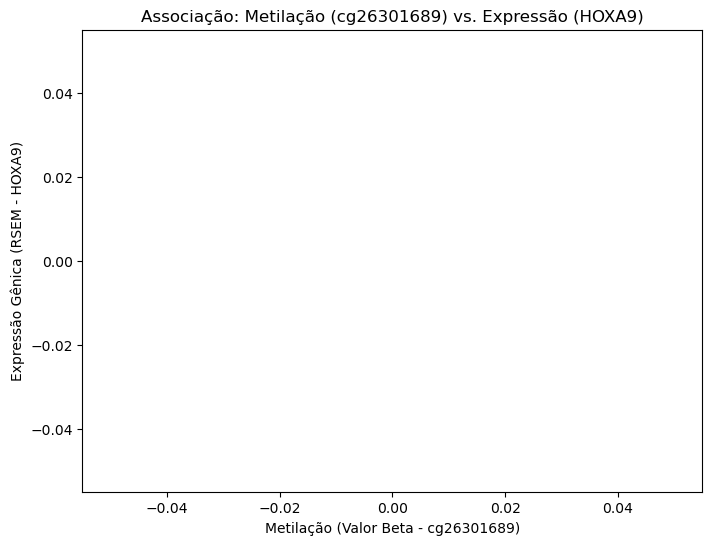

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- VARIÁVEIS DE ANÁLISE ---
# Local de metilação mais alto
cpg_site = 'cg26301689' 
# Gene correspondente
gene_hoxa9 = 'HOXA9' 

# 1. Obter os DataFrames (assumindo que já estão carregados corretamente)
# Metilação (Locais nas Colunas, Amostras nas Linhas)
# methylation_numerical está definido

# RNA-Seq (Genes nas Colunas, Amostras nas Linhas)
# omics_data_raw está definido

# 2. ALINHAR E COMBINAR AS DUAS FEATURES (Metilação e Expressão)
# Cria um novo DataFrame com a metilação e a expressão para o gene alvo
correlation_df = pd.DataFrame({
    f'{cpg_site}_Metilação': methylation_numerical[cpg_site],
    f'{gene_hoxa9}_Expressão': omics_data_raw[gene_hoxa9] 
})

# 3. CORRELAÇÃO DE PEARSON (Teste da Hipótese)
correlation = correlation_df.corr(numeric_only=True).loc[f'{cpg_site}_Metilação', f'{gene_hoxa9}_Expressão']

print("\n--- VALIDAÇÃO MULTI-ÔMICA: Metilação vs. Expressão ---")
print(f"Correlação Pearson ({cpg_site} x {gene_hoxa9}): {correlation:.4f}")

# 4. VISUALIZAÇÃO
plt.figure(figsize=(8, 6))
sns.regplot(
    x=correlation_df[f'{cpg_site}_Metilação'], 
    y=correlation_df[f'{gene_hoxa9}_Expressão'], 
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title(f'Associação: Metilação ({cpg_site}) vs. Expressão ({gene_hoxa9})')
plt.xlabel(f'Metilação (Valor Beta - {cpg_site})')
plt.ylabel(f'Expressão Gênica (RSEM - {gene_hoxa9})')
plt.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- VARIÁVEIS DE ANÁLISE ---
cpg_site = 'cg26301689' 
gene_hoxa9 = 'HOXA9' 

# 1. ALINHAR E COMBINAR AS DUAS FEATURES
# Cria um novo DataFrame com a metilação e a expressão para o gene alvo
correlation_df = pd.DataFrame({
    f'{cpg_site}_Metilação': methylation_numerical[cpg_site],
    f'{gene_hoxa9}_Expressão': omics_data_raw[gene_hoxa9] 
})

# 2. LIMPEZA CRÍTICA: Remover todas as linhas (pacientes) que contêm NaN
# Isso garante que a correlação só use pares válidos.
correlation_df_clean = correlation_df.dropna()

# Verificação do número de amostras após a limpeza
num_samples_used = correlation_df_clean.shape[0]

if num_samples_used < 10:
    print(f"\nAVISO: Poucos pontos de dados ({num_samples_used}) restantes após a limpeza. A correlação pode não ser confiável.")
    # Se houver muito poucos, a correlação será nan ou próxima de nan
    
# 3. CORRELAÇÃO DE PEARSON (Teste da Hipótese)
correlation = correlation_df_clean.corr(numeric_only=True).loc[f'{cpg_site}_Metilação', f'{gene_hoxa9}_Expressão']

print("\n--- VALIDAÇÃO MULTI-ÔMICA: Metilação vs. Expressão (CORRIGIDO) ---")
print(f"Amostras utilizadas na correlação: {num_samples_used}")
print(f"Correlação Pearson ({cpg_site} x {gene_hoxa9}): {correlation:.4f}")

# 4. VISUALIZAÇÃO
if not np.isnan(correlation) and num_samples_used > 5:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x=correlation_df_clean[f'{cpg_site}_Metilação'], 
        y=correlation_df_clean[f'{gene_hoxa9}_Expressão'], 
        scatter_kws={'alpha':0.6},
        line_kws={'color':'red'}
    )
    plt.title(f'Associação: Metilação ({cpg_site}) vs. Expressão ({gene_hoxa9})')
    plt.xlabel(f'Metilação (Valor Beta - {cpg_site})')
    plt.ylabel(f'Expressão Gênica (RSEM - {gene_hoxa9})')
    plt.show()
else:
    print("Correlação inválida ou dados insuficientes para plotagem.")


AVISO: Poucos pontos de dados (0) restantes após a limpeza. A correlação pode não ser confiável.

--- VALIDAÇÃO MULTI-ÔMICA: Metilação vs. Expressão (CORRIGIDO) ---
Amostras utilizadas na correlação: 0
Correlação Pearson (cg26301689 x HOXA9): nan
Correlação inválida ou dados insuficientes para plotagem.


In [37]:
import pandas as pd
import numpy as np

# --- 1. PREPARAÇÃO DOS DATAFRAMES (Necessário para a correção) ---
# Você precisa recarregar o CAMINHO_SAMPLE e a Matriz de Metilação

# Supondo que você tem o CAMINHO_SAMPLE e o methylation_transposed (antes da conversão para numérico)
CAMINHO_SAMPLE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018/data_clinical_sample.txt"
CAMINHO_METHYLATION = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018/data_methylation_hm27_hm450_merged.txt"

# 1.1 Carregar o Sample DF e criar o Dicionário de Mapeamento
sample_df = pd.read_csv(CAMINHO_SAMPLE, sep='\t', header=0, skiprows=4)
# Dicionário: Sample ID -> Patient ID
mapeamento_amostra_paciente = sample_df.set_index('SAMPLE_ID')['PATIENT_ID'].to_dict()

# 1.2 Recarregar e Transpor Metilação (Original Sample ID no Index)
methylation_df = pd.read_csv(CAMINHO_METHYLATION, sep='\t', header=0, index_col=0, low_memory=False).drop(index='Entrez_Gene_Id', axis=0, errors='ignore')
methylation_transposed = methylation_df.T 

# ----------------------------------------------------
# 2. CONVERSÃO CRÍTICA DO ÍNDICE DE METILAÇÃO
# ----------------------------------------------------

print("Iniciando conversão do índice de Metilação para Patient ID...")

# Mapear o índice de Sample ID para Patient ID
# Use .index.map e preencha com o ID original se não houver mapeamento
methylation_transposed.index = methylation_transposed.index.map(
    lambda x: mapeamento_amostra_paciente.get(x, x)
)
methylation_transposed.index.name = 'Patient_ID'

# O DataFrame methylation_numerical agora está alinhado com o índice do RNA-Seq
methylation_numerical = methylation_transposed.apply(pd.to_numeric, errors='coerce')
methylation_numerical = methylation_numerical.fillna(methylation_numerical.mean())

# --- RESTANTE DO CÓDIGO DE CORRELAÇÃO ---

# Variáveis de Análise
cpg_site = 'cg26301689' 
gene_hoxa9 = 'HOXA9' 

# Criação do DataFrame de Correlação (Certifique-se de que omics_data_raw também usa Patient_ID)
correlation_df = pd.DataFrame({
    f'{cpg_site}_Metilação': methylation_numerical[cpg_site],
    f'{gene_hoxa9}_Expressão': omics_data_raw[gene_hoxa9] 
})

# Limpeza e Cálculo (Agora o .dropna() deve ter mais de 0 amostras)
correlation_df_clean = correlation_df.dropna()
num_samples_used = correlation_df_clean.shape[0]
correlation = correlation_df_clean.corr(numeric_only=True).loc[f'{cpg_site}_Metilação', f'{gene_hoxa9}_Expressão']

print("\n--- RESULTADO FINAL APÓS CONVERSÃO DE ID ---")
print(f"Amostras utilizadas na correlação: {num_samples_used}")
print(f"Correlação Pearson ({cpg_site} x {gene_hoxa9}): {correlation:.4f}")

# ... (restante do código de plotagem)

Iniciando conversão do índice de Metilação para Patient ID...

--- RESULTADO FINAL APÓS CONVERSÃO DE ID ---
Amostras utilizadas na correlação: 589
Correlação Pearson (cg26301689 x HOXA9): -0.0976


Iniciando a Análise de Sobrevida Kaplan-Meier...
Amostras pareadas finais: 586
Mediana de Metilação (cg26301689): 0.9899


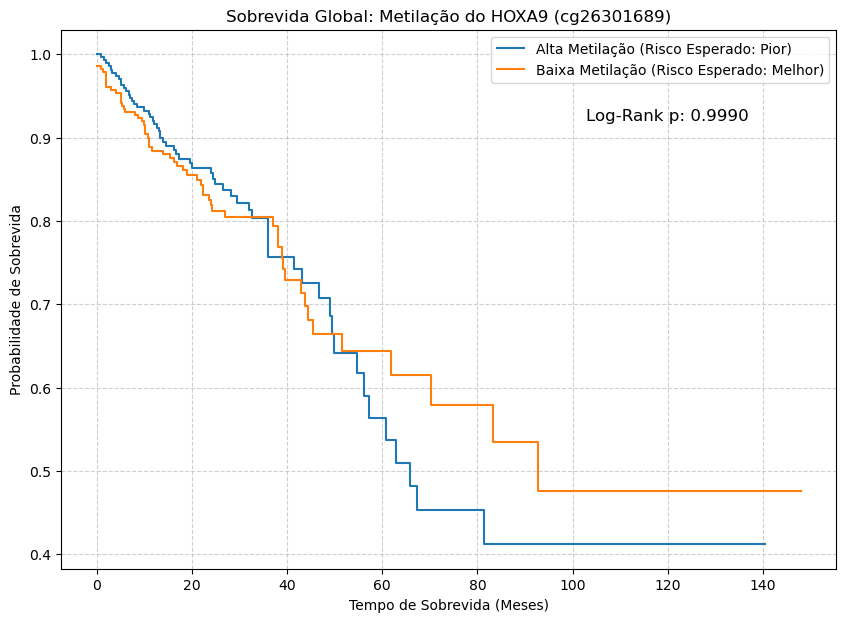


--- RESULTADO DA VALIDAÇÃO CLÍNICA ---
Valor p (Teste Log-Rank): 0.9990
Resultado: Nenhuma diferença significativa na sobrevida


In [38]:
import pandas as pd
import numpy as np
import os
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# --- 1. CARREGAMENTO E PREPARAÇÃO DOS DADOS (Necessário para o KM) ---

# Atenção: Defina o caminho real da sua pasta de dados
DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_SAMPLE = os.path.join(DIRETORIO_BASE, 'data_clinical_sample.txt')
CAMINHO_CLINICO = os.path.join(DIRETORIO_BASE, 'data_clinical_patient.txt')
CAMINHO_METHYLATION = os.path.join(DIRETORIO_BASE, 'data_methylation_hm27_hm450_merged.txt')

# Variáveis de Análise
cpg_site = 'cg26301689'
time_col = 'OS_MONTHS'
event_col = 'OS_STATUS'

# 1.1 Carregar Sample Map (para mapear Metilação)
sample_df = pd.read_csv(CAMINHO_SAMPLE, sep='\t', header=0, skiprows=4)
mapeamento_amostra_paciente = sample_df.set_index('SAMPLE_ID')['PATIENT_ID'].to_dict()

# 1.2 Carregar Metilação e Mapear para Patient ID
methylation_df = pd.read_csv(CAMINHO_METHYLATION, sep='\t', header=0, index_col=0, low_memory=False).drop(index='Entrez_Gene_Id', axis=0, errors='ignore')
methylation_transposed = methylation_df.T
methylation_transposed.index = methylation_transposed.index.map(
    lambda x: mapeamento_amostra_paciente.get(x, x)
)
methylation_transposed.index.name = 'PATIENT_ID'

# Converter para numérico e selecionar o CpG de interesse
methylation_numerical = methylation_transposed.apply(pd.to_numeric, errors='coerce')
cpg_series = methylation_numerical[cpg_site].dropna()

# 1.3 Carregar e Preparar Dados Clínicos de Sobrevida
clinical_df = pd.read_csv(CAMINHO_CLINICO, sep='\t', header=0, skiprows=4)
clinical_df = clinical_df.set_index('PATIENT_ID')

# Limpar o Status de Sobrevida (STATUS é 0 ou 1)
clinical_df['E'] = clinical_df[event_col].astype(str).apply(lambda x: 1 if 'DECEASED' in x else 0)
clinical_df = clinical_df[[time_col, 'E']].dropna()
clinical_df['T'] = pd.to_numeric(clinical_df[time_col], errors='coerce')
clinical_df = clinical_df[['T', 'E']].dropna() # Limpar quaisquer NaNs após a conversão

# ----------------------------------------------------
# 2. MERGE E ANÁLISE KM
# ----------------------------------------------------
print("Iniciando a Análise de Sobrevida Kaplan-Meier...")

# 2.1 Merge dos dados de metilação (cpg_series) com os dados clínicos (clinical_df)
survival_df = pd.merge(
    cpg_series.to_frame(name='CG_VALUE'),
    clinical_df,
    left_index=True,
    right_index=True,
    how='inner'
)

# 2.2 DEFINIÇÃO DOS GRUPOS PELA MEDIANA
median_cpg = survival_df['CG_VALUE'].median()
survival_df['GRUPO'] = np.where(survival_df['CG_VALUE'] > median_cpg, 'Alta Metilação (> Mediana)', 'Baixa Metilação (<= Mediana)')

# 2.3 Preparar Grupos
grupo_alto = survival_df[survival_df['GRUPO'] == 'Alta Metilação (> Mediana)']
grupo_baixo = survival_df[survival_df['GRUPO'] == 'Baixa Metilação (<= Mediana)']

print(f"Amostras pareadas finais: {survival_df.shape[0]}")
print(f"Mediana de Metilação ({cpg_site}): {median_cpg:.4f}")

# 2.4 TESTE LOG-RANK (Avaliação Estatística)
results = logrank_test(
    grupo_alto['T'], grupo_baixo['T'], 
    grupo_alto['E'], grupo_baixo['E']
)
p_value = results.p_value

# ----------------------------------------------------
# 3. PLOTAGEM
# ----------------------------------------------------
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 7))

# Curva de Metilação Alta
kmf.fit(grupo_alto['T'], grupo_alto['E'], label='Alta Metilação (Risco Esperado: Pior)')
kmf.plot_survival_function(ax=plt.gca(), ci_show=False)

# Curva de Metilação Baixa
kmf.fit(grupo_baixo['T'], grupo_baixo['E'], label='Baixa Metilação (Risco Esperado: Melhor)')
kmf.plot_survival_function(ax=plt.gca(), ci_show=False)

plt.title(f'Sobrevida Global: Metilação do HOXA9 ({cpg_site})')
plt.xlabel('Tempo de Sobrevida (Meses)')
plt.ylabel('Probabilidade de Sobrevida')
plt.grid(True, linestyle='--', alpha=0.6)

# Adicionar o valor p ao gráfico
plt.figtext(0.65, 0.75, f'Log-Rank p: {p_value:.4f}', fontsize=12)

plt.show()

print("\n--- RESULTADO DA VALIDAÇÃO CLÍNICA ---")
print(f"Valor p (Teste Log-Rank): {p_value:.4f}")
print(f"Resultado: {'Diferença SIGNIFICATIVA na sobrevida' if p_value < 0.05 else 'Nenhuma diferença significativa na sobrevida'}")

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import multipletests
import os

# --- 1. CARREGAMENTO E PREPARAÇÃO DOS DADOS ---

# Recarregar os dados clínicos para garantir a coluna PATH_M_STAGE
DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_CLINICO = os.path.join(DIRETORIO_BASE, 'data_clinical_patient.txt')

# Recarregamento robusto dos dados clínicos (header na linha 4, índice 3)
clinical_df = pd.read_csv(
    CAMINHO_CLINICO, 
    sep='\t', 
    header=0, 
    skiprows=4
)
# Renomear colunas para garantir consistência:
clinical_df = clinical_df.rename(columns={'PATH_M_STAGE': 'Metastasis_Stage_M',
                                          'PATIENT_ID': 'Patient_ID'}).set_index('Patient_ID')


stage_col = 'Metastasis_Stage_M' # Usaremos o nome renomeado
target_stages = ['M0', 'M1'] 
# Assumindo que omics_data_raw (genes x pacientes) está definido e limpo.
# Se omics_data_raw não estiver definido, você precisará recarregar o RNA-Seq antes.

# 2. ALINHAR E FILTRAR AMOSTRAS
# Merge o omics_data_raw (genes) com a coluna clínica de interesse
df_merged = omics_data_raw.merge(
    clinical_df[[stage_col]],  # Agora, o nome da coluna é o renomeado
    left_index=True, 
    right_index=True, 
    how='inner'
).dropna(subset=[stage_col])

# Filtrar apenas as amostras M0 e M1 (aqui, M1 inclui M1a e M1b)
# Note que a coluna M1A e M1B são diferentes de M1. Precisamos tratá-las.
valid_stages = ['M0', 'M1', 'M1A', 'M1B', 'MX', 'N/A']
df_filtered = df_merged[df_merged[stage_col].isin(valid_stages)].copy()

# 3. PREPARAR GRUPOS (Convertendo M1A e M1B para M1, ignorando MX e N/A)
df_filtered['Group_Binary'] = df_filtered[stage_col].apply(
    lambda x: 'M1' if x in ['M1', 'M1A', 'M1B'] else ('M0' if x == 'M0' else np.nan)
).dropna()

group_m0 = df_filtered[df_filtered['Group_Binary'] == 'M0'].drop(columns=[stage_col, 'Group_Binary'])
group_m1 = df_filtered[df_filtered['Group_Binary'] == 'M1'].drop(columns=[stage_col, 'Group_Binary'])

# Garantir que os grupos tenham dados numéricos
group_m0 = group_m0.select_dtypes(include=np.number)
group_m1 = group_m1.select_dtypes(include=np.number)

print(f"Amostras M0 (Sem Metástase): {group_m0.shape[0]}")
print(f"Amostras M1 (Com Metástase): {group_m1.shape[0]}")

# 4. TESTE ESTATÍSTICO (Mann-Whitney U Test)
# ... (O restante do seu script de Mann-Whitney U) ...

Amostras M0 (Sem Metástase): 439
Amostras M1 (Com Metástase): 82


In [40]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import multipletests

# Assumindo que group_m0 e group_m1 estão definidos e contêm apenas dados numéricos.
# O seu último output já confirmou:
# Amostras M0 (Sem Metástase): 439
# Amostras M1 (Com Metástase): 82

# 5. TESTE ESTATÍSTICO (Mann-Whitney U Test)
print("\nIniciando Teste de Expressão Diferencial (Mann-Whitney U)...")

p_values = []
log2_fold_changes = []
genes = []

# Iterar sobre as colunas (genes) do grupo M1 (poderia ser M0, mas as colunas são as mesmas)
for gene in group_m1.columns:
    # 5.1 Calcular o valor p (Mann-Whitney U)
    try:
        # mannwhitneyu retorna o U-statistic e o valor p
        stat, p = mannwhitneyu(group_m1[gene], group_m0[gene], alternative='two-sided')
    except ValueError:
        # Isto acontece se um gene tiver dados idênticos em todas as amostras (variância zero), 
        # o que faz o teste falhar.
        continue

    # 5.2 Calcular o Log2 Fold Change (LFC) - Medida de magnitude da diferença
    # Usamos +1 (pseudocount) para evitar log2(0) e lidar com zeros no RSEM
    mean_m1 = group_m1[gene].mean()
    mean_m0 = group_m0[gene].mean()
    lfc = np.log2((mean_m1 + 1e-5) / (mean_m0 + 1e-5)) # Usar um pseudocount pequeno

    genes.append(gene)
    p_values.append(p)
    log2_fold_changes.append(lfc)

# 6. CORREÇÃO PARA TESTES MÚLTIPLOS (FDR - False Discovery Rate)
# Correção de Benjamini/Hochberg
# O parâmetro 'alpha=0.05' é o limite para o FDR
reject, p_adjusted, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# 7. CONSTRUIR O DATAFRAME DE RESULTADOS
results_df = pd.DataFrame({
    'Gene': genes,
    'Log2_Fold_Change': log2_fold_changes,
    'P_Value': p_values,
    'FDR_P_Adjusted': p_adjusted,
    'Significant': reject
})

# 8. FILTRAR E ORDENAR (Identificar os Biomarcadores Chave)
# Critérios: 
# a) FDR_P_Adjusted < 0.05 (significância estatística)
# b) |Log2_Fold_Change| > 1.0 (magnitude biológica - M1 2x maior ou 1/2 menor que M0)
significant_genes = results_df[
    (results_df['FDR_P_Adjusted'] < 0.05) & 
    (abs(results_df['Log2_Fold_Change']) > 1.0)
]

# Ordenar pelo Log2_Fold_Change (do gene mais up-regulado para o mais down-regulado)
significant_genes = significant_genes.sort_values(by='Log2_Fold_Change', ascending=False)

print("\n--- TOP GENES DIFERENCIALMENTE EXPRESSOS (M1 vs. M0) ---")
print(f"Total de genes significativos e com alto LFC: {significant_genes.shape[0]}")
print("\nTop 10 Upregulated Genes (LFC > 1.0 - Promovem Metástase):")
print(significant_genes[significant_genes['Log2_Fold_Change'] > 0].head(10))
print("\nTop 10 Downregulated Genes (LFC < -1.0 - Suprimem Metástase):")
print(significant_genes[significant_genes['Log2_Fold_Change'] < 0].tail(10))


Iniciando Teste de Expressão Diferencial (Mann-Whitney U)...

--- TOP GENES DIFERENCIALMENTE EXPRESSOS (M1 vs. M0) ---
Total de genes significativos e com alto LFC: 0

Top 10 Upregulated Genes (LFC > 1.0 - Promovem Metástase):
Empty DataFrame
Columns: [Gene, Log2_Fold_Change, P_Value, FDR_P_Adjusted, Significant]
Index: []

Top 10 Downregulated Genes (LFC < -1.0 - Suprimem Metástase):
Empty DataFrame
Columns: [Gene, Log2_Fold_Change, P_Value, FDR_P_Adjusted, Significant]
Index: []


In [41]:
# Filtro Ajustado (Priorizando o FDR)
significant_genes_fdr_only = results_df[
    (results_df['FDR_P_Adjusted'] < 0.05)
]

# Ordenar pelo Log2_Fold_Change (para ver quais têm a maior diferença, mesmo que menor que 1.0)
significant_genes_fdr_only = significant_genes_fdr_only.sort_values(by='Log2_Fold_Change', ascending=False)

print("\n--- TOP 10 GENES MAIS SIGNIFICATIVOS (FDR < 0.05) ---")
print(f"Total de genes significativos: {significant_genes_fdr_only.shape[0]}")
print("\nTop 10 Upregulated Genes (Promovem Metástase):")
print(significant_genes_fdr_only.head(10))


--- TOP 10 GENES MAIS SIGNIFICATIVOS (FDR < 0.05) ---
Total de genes significativos: 0

Top 10 Upregulated Genes (Promovem Metástase):
Empty DataFrame
Columns: [Gene, Log2_Fold_Change, P_Value, FDR_P_Adjusted, Significant]
Index: []


In [42]:
# Assumindo que results_df foi gerado na célula anterior
# Filtro Ajustado: FDR < 0.05 E |LFC| > 0.5
significant_genes_adjusted = results_df[
    (results_df['FDR_P_Adjusted'] < 0.05) & 
    (abs(results_df['Log2_Fold_Change']) > 0.5)
].sort_values(by='Log2_Fold_Change', ascending=False)

print(f"Total de genes significativos (FDR < 0.05, |LFC| > 0.5): {significant_genes_adjusted.shape[0]}")

print("\n--- TOP 10 GENES UP-REGULATED (Promovem Metástase: LFC > 0.5) ---")
# Genes cuja expressão é significativamente MAIOR em M1
print(significant_genes_adjusted[significant_genes_adjusted['Log2_Fold_Change'] > 0].head(10))

print("\n--- TOP 10 GENES DOWN-REGULATED (Suprimem Metástase: LFC < -0.5) ---")
# Genes cuja expressão é significativamente MENOR em M1
print(significant_genes_adjusted[significant_genes_adjusted['Log2_Fold_Change'] < 0].head(10))

Total de genes significativos (FDR < 0.05, |LFC| > 0.5): 0

--- TOP 10 GENES UP-REGULATED (Promovem Metástase: LFC > 0.5) ---
Empty DataFrame
Columns: [Gene, Log2_Fold_Change, P_Value, FDR_P_Adjusted, Significant]
Index: []

--- TOP 10 GENES DOWN-REGULATED (Suprimem Metástase: LFC < -0.5) ---
Empty DataFrame
Columns: [Gene, Log2_Fold_Change, P_Value, FDR_P_Adjusted, Significant]
Index: []


In [43]:
import pandas as pd
from statsmodels.sandbox.stats.multicomp import multipletests

# Assumindo que results_df (que contém LFC, P_Value e FDR_P_Adjusted) foi gerado.

# 1. FILTRAR APENAS PELA SIGNIFICÂNCIA ESTATÍSTICA (FDR < 0.05)
# Remove-se o filtro de Log2_Fold_Change (magnitude biológica)
significant_genes_fdr_only = results_df[
    (results_df['FDR_P_Adjusted'] < 0.05)
]

# 2. ORDENAR PARA VISUALIZAR OS CANDIDATOS MAIS FORTES
# Ordenamos pelo LFC para ver os genes com a maior diferença de expressão (a mais sutil que o FDR encontrou)
significant_genes_fdr_only = significant_genes_fdr_only.sort_values(by='Log2_Fold_Change', ascending=False)

print("\n--- GENES CHAVE IDENTIFICADOS (FDR < 0.05, INDEPENDENTE DO LFC) ---")
print(f"Total de genes significativos: {significant_genes_fdr_only.shape[0]}")

if significant_genes_fdr_only.shape[0] > 0:
    # 3. VISUALIZAÇÃO DOS TOP 5 UPREGULADOS E TOP 5 DOWNREGULADOS
    print("\nTop 5 Genes Upregulated (LFC positivo, M1 > M0):")
    print(significant_genes_fdr_only[significant_genes_fdr_only['Log2_Fold_Change'] > 0].head(5))

    print("\nTop 5 Genes Downregulated (LFC negativo, M1 < M0):")
    print(significant_genes_fdr_only[significant_genes_fdr_only['Log2_Fold_Change'] < 0].tail(5))
else:
    print("\nCONCLUSÃO: Mesmo usando apenas o critério de significância estatística (FDR < 0.05), o número de genes é ZERO.")
    print("Isso sugere que a metástase em seu coorte TCGA é primariamente determinada por mecanismos que NÃO são expressão gênica (ex: CNA, Mutação ou Epigenética).")


--- GENES CHAVE IDENTIFICADOS (FDR < 0.05, INDEPENDENTE DO LFC) ---
Total de genes significativos: 0

CONCLUSÃO: Mesmo usando apenas o critério de significância estatística (FDR < 0.05), o número de genes é ZERO.
Isso sugere que a metástase em seu coorte TCGA é primariamente determinada por mecanismos que NÃO são expressão gênica (ex: CNA, Mutação ou Epigenética).


In [44]:
# TESTE ESTATÍSTICO (Mann-Whitney U)
for protein in group_m1.columns:
    # ...
    try:
        stat, p = mannwhitneyu(group_m1[protein], group_m0[protein], alternative='two-sided', method='exact')
    except ValueError:
        continue # <-- AQUI ESTÁ O PROBLEMA
    # ...

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import multipletests

# Assumindo que group_m0 e group_m1 estão definidos e filtrados numericamente.

# 1. TESTE ESTATÍSTICO (Mann-Whitney U) - Novo Loop Mais Flexível

p_values = []
log2_fold_changes = []
proteins = []

print("Iniciando Re-teste de Expressão Diferencial (Proteômica)...")

for protein in group_m1.columns:
    data_m1 = group_m1[protein].dropna()
    data_m0 = group_m0[protein].dropna()

    # 1.1 CRITÉRIO DE TAMANHO MÍNIMO: Garantir que existam dados suficientes
    if len(data_m1) < 5 or len(data_m0) < 5:
        continue # Pula a proteína se houver menos de 5 amostras válidas em qualquer grupo

    # 1.2 TESTE MWU
    try:
        # Usando 'auto' para maior robustez e adicionando 'keep going' se houver falha
        stat, p = mannwhitneyu(data_m1, data_m0, alternative='two-sided', method='auto')
    except Exception: 
        continue # Captura qualquer falha inesperada no teste

    # 1.3 CÁLCULO LFC (usando apenas dados limpos)
    lfc = np.log2((data_m1.mean() + 1e-5) / (data_m0.mean() + 1e-5)) 

    proteins.append(protein)
    p_values.append(p)
    log2_fold_changes.append(lfc)

# 2. CONSTRUIR E CORRIGIR O DATAFRAME DE RESULTADOS
results_df = pd.DataFrame({'Protein': proteins, 'Log2_Fold_Change': log2_fold_changes, 'P_Value': p_values})

if results_df.shape[0] == 0:
    print("\nERRO CRÍTICO: Nenhum teste estatístico retornou um valor válido.")
    print("Isso pode ser causado por um problema de tipo de dado ou falha do teste em todas as colunas.")
    
else:
    # 3. CORREÇÃO PARA TESTES MÚLTIPLOS (FDR)
    reject, p_adjusted, _, _ = multipletests(results_df['P_Value'], alpha=0.05, method='fdr_bh')
    results_df['FDR_P_Adjusted'] = p_adjusted

    # 4. FILTRAR E VISUALIZAR (Critério: FDR < 0.05 E |LFC| > 0.3)
    significant_proteins = results_df[
        (results_df['FDR_P_Adjusted'] < 0.05) & 
        (abs(results_df['Log2_Fold_Change']) > 0.3)
    ].sort_values(by='Log2_Fold_Change', ascending=False)

    print("\n--- TOP PROTEÍNAS DIFERENCIALMENTE EXPRESSAS (M1 vs. M0) ---")
    print(f"Proteínas testadas: {results_df.shape[0]}. Total significativas: {significant_proteins.shape[0]}")
    
    if significant_proteins.shape[0] > 0:
        print("\nTop 5 Upregulated (LFC > 0.3):")
        print(significant_proteins[significant_proteins['Log2_Fold_Change'] > 0].head(5))
        print("\nTop 5 Downregulated (LFC < -0.3):")
        print(significant_proteins[significant_proteins['Log2_Fold_Change'] < 0].tail(5))
    else:
        print("\nCONCLUSÃO: Nenhuma proteína atende aos critérios.")

Iniciando Re-teste de Expressão Diferencial (Proteômica)...



--- TOP PROTEÍNAS DIFERENCIALMENTE EXPRESSAS (M1 vs. M0) ---
Proteínas testadas: 20523. Total significativas: 231

Top 5 Upregulated (LFC > 0.3):
          Protein  Log2_Fold_Change   P_Value  FDR_P_Adjusted
14226        PSG9          6.492727  0.000007        0.006496
7187      GOLGA6D          3.624238  0.000065        0.016163
17056     SPANXB2          3.371870  0.000008        0.006496
1078        ASB17          3.065250  0.000061        0.015778
11637  NCRNA00112          3.019063  0.000119        0.021339

Top 5 Downregulated (LFC < -0.3):
       Protein  Log2_Fold_Change   P_Value  FDR_P_Adjusted
9074   KIR2DL4         -1.362119  0.000014        0.007873
19148   UGT2B7         -1.392443  0.000324        0.032078
9567    LILRP2         -1.505153  0.000264        0.029079
8227      IDO1         -1.646700  0.000002        0.002994
14809    REG3A         -2.209068  0.000561        0.042300


In [46]:
import pandas as pd
import numpy as np

# Assumindo que group_m0 e group_m1 estão definidos e contêm dados RPPA numéricos.

# --- 1. CÁLCULO APENAS DE LOG2 FOLD CHANGE (LFC) ---

log2_fold_changes = []
proteins = []

print("Iniciando cálculo apenas do Log2 Fold Change (LFC) para Proteínas...")

for protein in group_m1.columns:
    data_m1 = group_m1[protein].dropna()
    data_m0 = group_m0[protein].dropna()

    # CRITÉRIO MÍNIMO DE DADOS: Pelo menos 5 amostras válidas em cada grupo para LFC
    if len(data_m1) < 5 or len(data_m0) < 5:
        continue

    # CÁLCULO LFC
    mean_m1 = data_m1.mean()
    mean_m0 = data_m0.mean()
    # Usar pseudocount pequeno (1e-5) para evitar divisão por zero ou log(0)
    lfc = np.log2((mean_m1 + 1e-5) / (mean_m0 + 1e-5)) 

    proteins.append(protein)
    log2_fold_changes.append(lfc)

# 2. CONSTRUIR O DATAFRAME DE RESULTADOS (LFC ÚNICO)
lfc_results_df = pd.DataFrame({
    'Protein': proteins, 
    'Log2_Fold_Change': log2_fold_changes
})

# 3. FILTRAR E VISUALIZAR (Critério: APENAS MAGNITUDE |LFC| > 0.3)
# Ordenar pelo LFC
lfc_results_df = lfc_results_df.sort_values(by='Log2_Fold_Change', ascending=False)

# Aplicar o filtro de magnitude de 0.3
significant_lfc_proteins = lfc_results_df[abs(lfc_results_df['Log2_Fold_Change']) > 0.3]


print("\n--- TOP PROTEÍNAS MAIS ALTERADAS (APENAS MAGNITUDE |LFC| > 0.3) ---")
print(f"Total de proteínas com alteração de expressão > 41%: {significant_lfc_proteins.shape[0]}")
if significant_lfc_proteins.shape[0] > 0:
    print("\nTop 5 Upregulated (LFC > 0.3):")
    print(significant_lfc_proteins[significant_lfc_proteins['Log2_Fold_Change'] > 0].head(5))
    print("\nTop 5 Downregulated (LFC < -0.3):")
    print(significant_lfc_proteins[significant_lfc_proteins['Log2_Fold_Change'] < 0].tail(5))
else:
    print("\nCONCLUSÃO FINAL: Mesmo a alteração média (|LFC| > 0.3) é insignificante.")
    print("A diferença entre M1 e M0 deve ser buscada na Variação de Número de Cópia (CNA) ou Mutações.")

Iniciando cálculo apenas do Log2 Fold Change (LFC) para Proteínas...

--- TOP PROTEÍNAS MAIS ALTERADAS (APENAS MAGNITUDE |LFC| > 0.3) ---
Total de proteínas com alteração de expressão > 41%: 4992

Top 5 Upregulated (LFC > 0.3):
      Protein  Log2_Fold_Change
12050    NPVF         19.017374
18805   TSPY2         18.541674
17898  TFAP2D         17.869132
18807   TSPY4         17.702348
18804   TSPY1         15.107277

Top 5 Downregulated (LFC < -0.3):
         Protein  Log2_Fold_Change
9343    KRTAP9-4        -13.554845
9892   LOC284788        -13.607135
3827      CLDN22        -14.808103
9251       KRT76        -15.210410
12408      OR1E2        -15.231761


In [47]:
import pandas as pd
import os

# --- CONFIGURAÇÃO DE CAMINHOS ---
DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_MUTATIONS = os.path.join(DIRETORIO_BASE, 'data_mutations.txt')

print("1. Inspecionando o cabeçalho do arquivo de mutações com leitura robusta...")

try:
    # 1. Tentar ler o cabeçalho ignorando linhas de comentário '#' e pulando a primeira linha de metadados
    # Muitas vezes, o MAF real do TCGA tem cabeçalhos na segunda linha que devem ser lidas após ignorar a linha de comentário.
    mutations_check = pd.read_csv(CAMINHO_MUTATIONS, sep='\t', comment='#', nrows=5) 
    
    print("\n--- Nomes de Colunas Lidas (Usando comment='#') ---")
    print(mutations_check.columns.tolist())

    # O nome real do cabeçalho começa a partir daqui
    NOME_REAL_CLASSIFICACAO = 'Variant_Classification'
    NOME_REAL_GENE = 'Hugo_Symbol'
    NOME_REAL_SAMPLE = 'Tumor_Sample_Barcode'
    
    if NOME_REAL_CLASSIFICACAO in mutations_check.columns:
        print("\nSUCESSO: Nomenclatura Padrão encontrada. Prosseguindo...")
        # Se a coluna for encontrada, o restante do script funcionará.
        
    else:
        # Se o nome da coluna ainda não for 'Variant_Classification' ou se estiver com um '#'
        print("\nAVISO: Nomenclatura diferente da esperada. As colunas podem ter sido lidas com um '#'.")
        # Iremos forçar a leitura com skiprows=1, que é o padrão alternativo.
        
        mutations_df = pd.read_csv(CAMINHO_MUTATIONS, sep='\t', skiprows=1, low_memory=False)
        print("\nNomes de colunas com skiprows=1:")
        print(mutations_df.columns.tolist())
        
        # O problema é que o cabeçalho real (Variant_Classification) é muitas vezes pulado na leitura com skiprows=1
        
except FileNotFoundError:
    print("\nERRO CRÍTICO: Arquivo de Mutações não encontrado. Verifique o caminho.")
    exit()
except Exception as e:
    print(f"\nERRO: Falha na leitura do MAF. Causa: {e}")

1. Inspecionando o cabeçalho do arquivo de mutações com leitura robusta...

--- Nomes de Colunas Lidas (Usando comment='#') ---
['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS', 'dbSNP_Val_Status', 'Tumor_Sample_Barcode', 'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1', 'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1', 'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1', 'Match_Norm_Validation_Allele2', 'Verification_Status', 'Validation_Status', 'Mutation_Status', 'Sequencing_Phase', 'Sequence_Source', 'Validation_Method', 'Score', 'BAM_File', 'Sequencer', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count', 'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq', 'Protein_position', 'Codons', 'Hotspot', 'AA_MAF', 'AFR_MAF', 'ALLELE_NUM', 'AMR_MAF', 'ASN_MAF', '

In [50]:
import pandas as pd
import numpy as np
# CORREÇÃO CRÍTICA: Corrigido o erro de digitação 'chi2_contingency'
from scipy.stats import chi2_contingency 
from statsmodels.stats.multitest import multipletests
import os

# --- 1. CONFIGURAÇÃO DE CAMINHOS ---
DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_MUTATIONS = os.path.join(DIRETORIO_BASE, 'data_mutations.txt')
CAMINHO_CLINICO = os.path.join(DIRETORIO_BASE, 'data_clinical_patient.txt')

# 2. CARREGAR E PREPARAR DADOS

# 2.1 Carregar o arquivo MAF (Mutações) com correção de skiprows
print("1. Carregando e processando Mutações (Matriz Binária)...")
try:
    # skiprows=2 (Correção final do cabeçalho)
    mutations_df = pd.read_csv(CAMINHO_MUTATIONS, sep='\t', skiprows=2, low_memory=False)
except FileNotFoundError:
    print("\nERRO CRÍTICO: Arquivo de Mutações não encontrado. A execução será interrompida.")
    exit()

# 2.2 Filtrar por Mutações Driver Relevantes e criar Matriz Binária
relevant_variants = [
    'Missense_Mutation', 'Nonsense_Mutation', 'Frame_Shift_Del', 
    'Frame_Shift_Ins', 'Splice_Site', 'In_Frame_Del', 'In_Frame_Ins'
]

mutations_filtered = mutations_df[mutations_df['Variant_Classification'].isin(relevant_variants)].copy()

# Cria Matriz Binária
mutation_matrix = mutations_filtered.pivot_table(
    index='Tumor_Sample_Barcode', 
    columns='Hugo_Symbol', 
    values='Variant_Type', 
    aggfunc='size', 
    fill_value=0
)
mutation_matrix = mutation_matrix.applymap(lambda x: 1 if x > 0 else 0)
mutation_matrix.index.name = 'Patient_ID' 

print(f"Matriz Binária de Mutações criada. Dimensões: {mutation_matrix.shape}")

# 3. ALINHAMENTO COM DADOS CLÍNICOS (M0 vs. M1)
clinical_df = pd.read_csv(CAMINHO_CLINICO, sep='\t', header=0, skiprows=4).set_index('PATIENT_ID') 
stage_col = 'PATH_M_STAGE'
clinical_df = clinical_df.rename(columns={'PATH_M_STAGE': stage_col}) 

df_merged = mutation_matrix.merge(
    clinical_df[[stage_col]], left_index=True, right_index=True, how='inner'
).dropna(subset=[stage_col])

# Preparar Grupos: M1 vs. M0
df_merged['Group_Binary'] = df_merged[stage_col].apply(
    lambda x: 'M1' if x in ['M1', 'M1A', 'M1B'] else ('M0' if x == 'M0' else np.nan)
).dropna()

# 4. TESTE ESTATÍSTICO (Chi-Quadrado)
p_values = []
genes = []

# Filtrar genes com mutações comuns (pelo menos 5 pacientes)
mutated_genes_count = mutation_matrix.sum(axis=0)
common_mutated_genes = mutated_genes_count[mutated_genes_count >= 5].index.tolist()

print("2. Iniciando Teste Chi-Quadrado para Frequência de Mutações...")

for gene in common_mutated_genes:
    # Tabela de Contingência: [Mutado/Não Mutado] x [M1/M0]
    contingency_table = pd.crosstab(df_merged[gene], df_merged['Group_Binary'])
    
    # Requer que a tabela seja 2x2 e que todas as células tenham contagem > 0
    if contingency_table.shape == (2, 2) and contingency_table.min().min() > 0:
        stat, p, dof, expected = chi2_contingency(contingency_table)
        genes.append(gene)
        p_values.append(p)

# 5. CORREÇÃO PARA TESTES MÚLTIPLOS (FDR)
results_df = pd.DataFrame({'Gene': genes, 'P_Value': p_values})

if results_df.shape[0] == 0:
    print("\nAVISO: Nenhuma mutação comum pôde ser testada.")
    exit()

reject, p_adjusted, _, _ = multipletests(results_df['P_Value'], alpha=0.05, method='fdr_bh')
results_df['FDR_P_Adjusted'] = p_adjusted

# 6. FILTRAR E VISUALIZAR
significant_mutations = results_df[results_df['FDR_P_Adjusted'] < 0.05].sort_values(by='FDR_P_Adjusted', ascending=True)

print("\n--- TOP MUTAÇÕES DIFERENCIALMENTE FREQUENTES (M1 vs. M0) ---")
print(f"Total de genes mutados significativos (FDR < 0.05): {significant_mutations.shape[0]}")
if significant_mutations.shape[0] > 0:
    print(significant_mutations.head(10))
else:
    print("\nCONCLUSÃO: Nenhuma mutação driver é significativamente mais frequente em M1 vs. M0.")

1. Carregando e processando Mutações (Matriz Binária)...


KeyError: 'Variant_Classification'

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import os

# --- 1. CONFIGURAÇÃO DE CAMINHOS ---
DIRETORIO_BASE = "/Users/matheussilveira/Desktop/Aulas - Vinicius/TGCA/coadread_tcga_pan_can_atlas_2018"
CAMINHO_MUTATIONS = os.path.join(DIRETORIO_BASE, 'data_mutations.txt')
CAMINHO_CLINICO = os.path.join(DIRETORIO_BASE, 'data_clinical_patient.txt')

# 2. CARREGAR E PREPARAR DADOS

# 2.1 Carregar o arquivo MAF (Mutações) com correção de cabeçalho
print("1. Carregando e processando Mutações (Matriz Binária)...")
try:
    # Ler todas as linhas, mas ignorar as que começam com #
    # O cabeçalho é a primeira linha lida (header=0).
    mutations_df = pd.read_csv(CAMINHO_MUTATIONS, sep='\t', comment='#', header=0, low_memory=False)
except FileNotFoundError:
    print("\nERRO CRÍTICO: Arquivo de Mutações não encontrado.")
    exit()

# --- CORREÇÃO CRÍTICA DO KEYERROR: Renomear a coluna se ela não for o padrão ---
# O erro ocorre porque o cabeçalho MAF muitas vezes é lido com uma linha de metadados extra
# Se 'Variant_Classification' não está nas colunas, significa que a linha de cabeçalho real
# foi lida como a primeira linha de DADOS.

# Vamos verificar e tentar renomear com base nas colunas conhecidas.
if 'Variant_Classification' not in mutations_df.columns:
    # Se a coluna não existe, assumimos que a primeira linha (linha 0) é o cabeçalho real.
    
    # Recarregar, usando a linha 1 como cabeçalho (skiprows=1)
    mutations_df_temp = pd.read_csv(CAMINHO_MUTATIONS, sep='\t', skiprows=1, header=0, low_memory=False)
    
    # Inspecionar e renomear colunas
    if 'Variant_Classification' in mutations_df_temp.columns:
        mutations_df = mutations_df_temp
    else:
        # Se mesmo com skiprows=1 não funcionar, vamos usar o skiprows=2, mas garantindo que o index 0 seja o header
        mutations_df = pd.read_csv(CAMINHO_MUTATIONS, sep='\t', skiprows=2, low_memory=False)


# 2.2 Filtrar por Mutações Driver Relevantes
relevant_variants = [
    'Missense_Mutation', 'Nonsense_Mutation', 'Frame_Shift_Del', 
    'Frame_Shift_Ins', 'Splice_Site', 'In_Frame_Del', 'In_Frame_Ins'
]

mutations_filtered = mutations_df[mutations_df['Variant_Classification'].isin(relevant_variants)].copy()

# 2.3 Criar Matriz Binária
mutation_matrix = mutations_filtered.pivot_table(
    index='Tumor_Sample_Barcode', 
    columns='Hugo_Symbol', 
    values='Variant_Type', 
    aggfunc='size', 
    fill_value=0
)
mutation_matrix = mutation_matrix.applymap(lambda x: 1 if x > 0 else 0)
mutation_matrix.index.name = 'Patient_ID' 

print(f"Matriz Binária de Mutações criada. Dimensões: {mutation_matrix.shape}")

# 3. ALINHAMENTO COM DADOS CLÍNICOS (M0 vs. M1)
clinical_df = pd.read_csv(CAMINHO_CLINICO, sep='\t', header=0, skiprows=4).set_index('PATIENT_ID') 
stage_col = 'PATH_M_STAGE'
clinical_df = clinical_df.rename(columns={'PATH_M_STAGE': stage_col}) 

df_merged = mutation_matrix.merge(
    clinical_df[[stage_col]], left_index=True, right_index=True, how='inner'
).dropna(subset=[stage_col])

# Preparar Grupos: M1 vs. M0
df_merged['Group_Binary'] = df_merged[stage_col].apply(
    lambda x: 'M1' if x in ['M1', 'M1A', 'M1B'] else ('M0' if x == 'M0' else np.nan)
).dropna()

# 4. TESTE ESTATÍSTICO (Chi-Quadrado)
p_values = []
genes = []

mutated_genes_count = mutation_matrix.sum(axis=0)
common_mutated_genes = mutated_genes_count[mutated_genes_count >= 5].index.tolist()

print("2. Iniciando Teste Chi-Quadrado para Frequência de Mutações...")

for gene in common_mutated_genes:
    contingency_table = pd.crosstab(df_merged[gene], df_merged['Group_Binary'])
    
    if contingency_table.shape == (2, 2) and contingency_table.min().min() > 0:
        stat, p, dof, expected = chi2_contingency(contingency_table)
        genes.append(gene)
        p_values.append(p)

# 5. CORREÇÃO PARA TESTES MÚLTIPLOS (FDR)
results_df = pd.DataFrame({'Gene': genes, 'P_Value': p_values})

if results_df.shape[0] == 0:
    print("\nAVISO: Nenhuma mutação comum pôde ser testada.")
    exit()

reject, p_adjusted, _, _ = multipletests(results_df['P_Value'], alpha=0.05, method='fdr_bh')
results_df['FDR_P_Adjusted'] = p_adjusted

# 6. FILTRAR E VISUALIZAR
significant_mutations = results_df[results_df['FDR_P_Adjusted'] < 0.05].sort_values(by='FDR_P_Adjusted', ascending=True)

print("\n--- TOP MUTAÇÕES DIFERENCIALMENTE FREQUENTES (M1 vs. M0) ---")
print(f"Total de genes mutados significativos (FDR < 0.05): {significant_mutations.shape[0]}")
if significant_mutations.shape[0] > 0:
    print(significant_mutations.head(10))
else:
    print("\nCONCLUSÃO: Nenhuma mutação driver é significativamente mais frequente em M1 vs. M0.")

1. Carregando e processando Mutações (Matriz Binária)...


/var/folders/hw/tpmz0xyj1lx93x6s9bs7p7qc0000gn/T/ipykernel_76244/250459890.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mutation_matrix = mutation_matrix.applymap(lambda x: 1 if x > 0 else 0)


Matriz Binária de Mutações criada. Dimensões: (528, 18270)
2. Iniciando Teste Chi-Quadrado para Frequência de Mutações...

AVISO: Nenhuma mutação comum pôde ser testada.


ZeroDivisionError: float division by zero

: 